<a href="https://colab.research.google.com/github/Jassibro/Regression-Project/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project aimed to develop a predictive model for forecasting sales at Rossman stores using linear regression and regularization techniques. The dataset provided detailed information about store characteristics, promotional activities, holidays, and historical sales data.

The data exploration phase revealed important insights such as higher sales on weekends and the impact of promotions and holidays on sales. The relationship between competition distance and sales was also explored, indicating a potential influence of convenience and customer preference for clustered shopping areas.

The predictive model was built using linear regression and regularization techniques, specifically Lasso and Ridge regression. These techniques addressed issues such as overfitting and multicollinearity. The models were evaluated using metrics such as mean squared error, root mean squared error, mean absolute error, and R-squared score. The tuned models with regularization parameters showed improved performance compared to the base linear regression model.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
rossman_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")
store=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

### Dataset First View

In [4]:
# Dataset First Look
rossman_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
rossman_store.sample(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
303638   1043          2  2014-10-21   8366       1084     1      1   
523452    188          3  2014-03-19   5021        439     1      1   
475965    646          4  2014-05-01      0          0     0      1   
712198    499          2  2013-10-01   4020        658     1      0   
743022    103          2  2013-09-03   3450        355     1      0   
909336    282          7  2013-04-07      0          0     0      0   
187506    187          5  2015-02-13   6581        881     1      0   
691212    698          7  2013-10-20      0          0     0      0   
944128    509          4  2013-03-07   7818        580     1      1   
689545    146          1  2013-10-21   9340        804     1      1   

       StateHoliday  SchoolHoliday  
303638            0              0  
523452            0              0  
475965            a              0  
712198            0              0  
743022            0              0  
909336            0              0  
187506            0              0  
691212            0              0  
944128            0              0  
689545            0              1

In [6]:
# Dataset First Look
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
store.sample(10)

Store StoreType Assortment  CompetitionDistance  \
119     120         d          a               2290.0   
238     239         d          c                610.0   
1076   1077         a          a               3750.0   
914     915         d          c                650.0   
622     623         a          a               4080.0   
162     163         a          a               1480.0   
1109   1110         c          c                900.0   
548     549         a          c               2330.0   
299     300         a          c                120.0   
878     879         d          a                  NaN   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
119                        12.0                    2014.0       1   
238                         NaN                       NaN       0   
1076                       11.0                    2001.0       1   
914                         3.0                    2013.0       1   
622                         3.0                    2011.0       1   
162                         4.0                    2009.0       0   
1109                        9.0                    2010.0       0   
548                         NaN                       NaN       0   
299                         4.0                    2009.0       1   
878                         NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
119              37.0           2009.0   Jan,Apr,Jul,Oct  
238               NaN              NaN               NaN  
1076             35.0           2010.0  Mar,Jun,Sept,Dec  
914              40.0           2014.0   Jan,Apr,Jul,Oct  
622              13.0           2010.0   Jan,Apr,Jul,Oct  
162               NaN              NaN               NaN  
1109              NaN              NaN               NaN  
548               NaN              NaN               NaN  
299               1.0           2012.0   Jan,Apr,Jul,Oct  
878               5.0           2013.0   Feb,May,Aug,Nov

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
rows_and_columns=rossman_store.shape
print(f"There are {rows_and_columns[0]} Rows and {rows_and_columns[1]} Columns, in rossman_store dataset.")

There are 1017209 Rows and 9 Columns, in rossman_store dataset.


In [9]:
rows_and_columns_in_store=store.shape
print(f"There are {rows_and_columns_in_store[0]} Rows and {rows_and_columns_in_store[1]} Columns in Store dataset.")

There are 1115 Rows and 10 Columns in Store dataset.


### Dataset Information

In [10]:
# Dataset Info
rossman_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
rossman_store[rossman_store.duplicated()].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store[store.duplicated()].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
na_value_r=rossman_store.isna().sum()
na_value_r

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
na_value_s=store.isna().sum()
na_value_s

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

<Figure size 800x600 with 0 Axes>

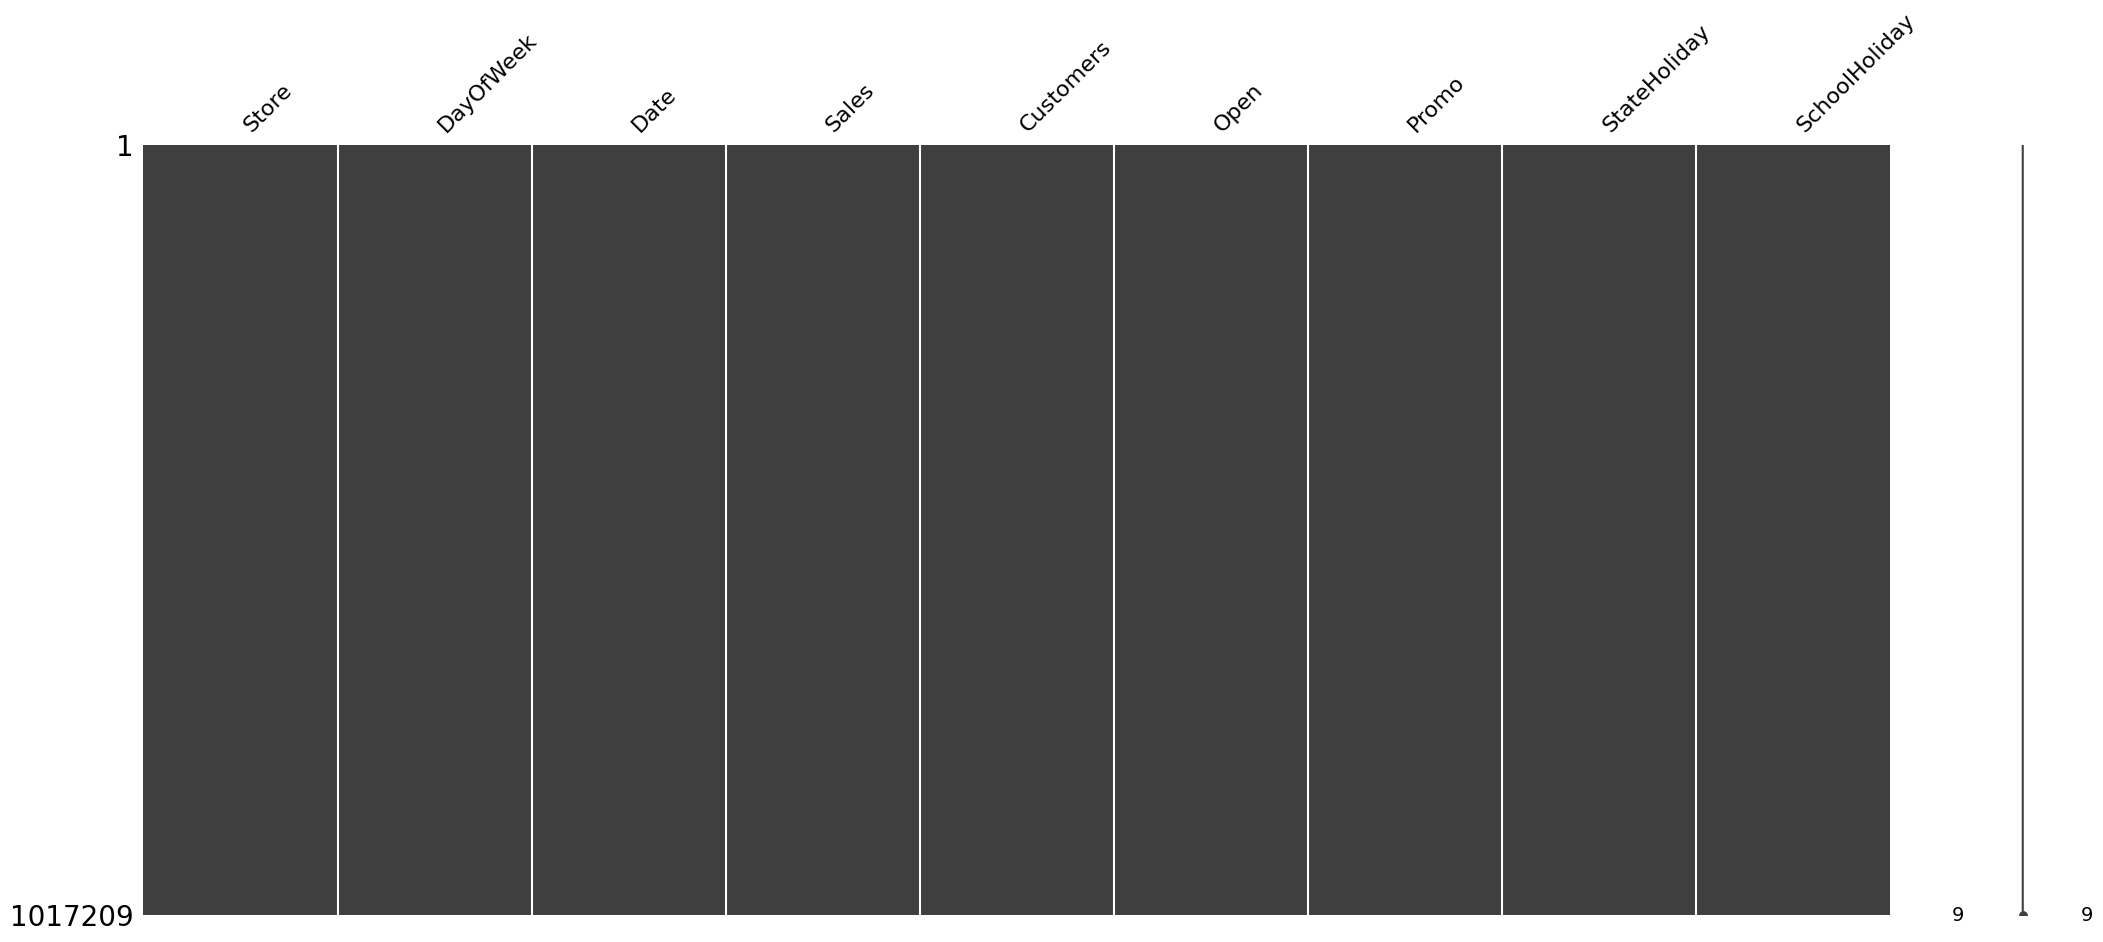

In [16]:
# Visualizing the missing values of rossman_store dataset
plt.figure(figsize=(8,6))
msno.matrix(rossman_store)

<Axes: >

<Figure size 800x600 with 0 Axes>

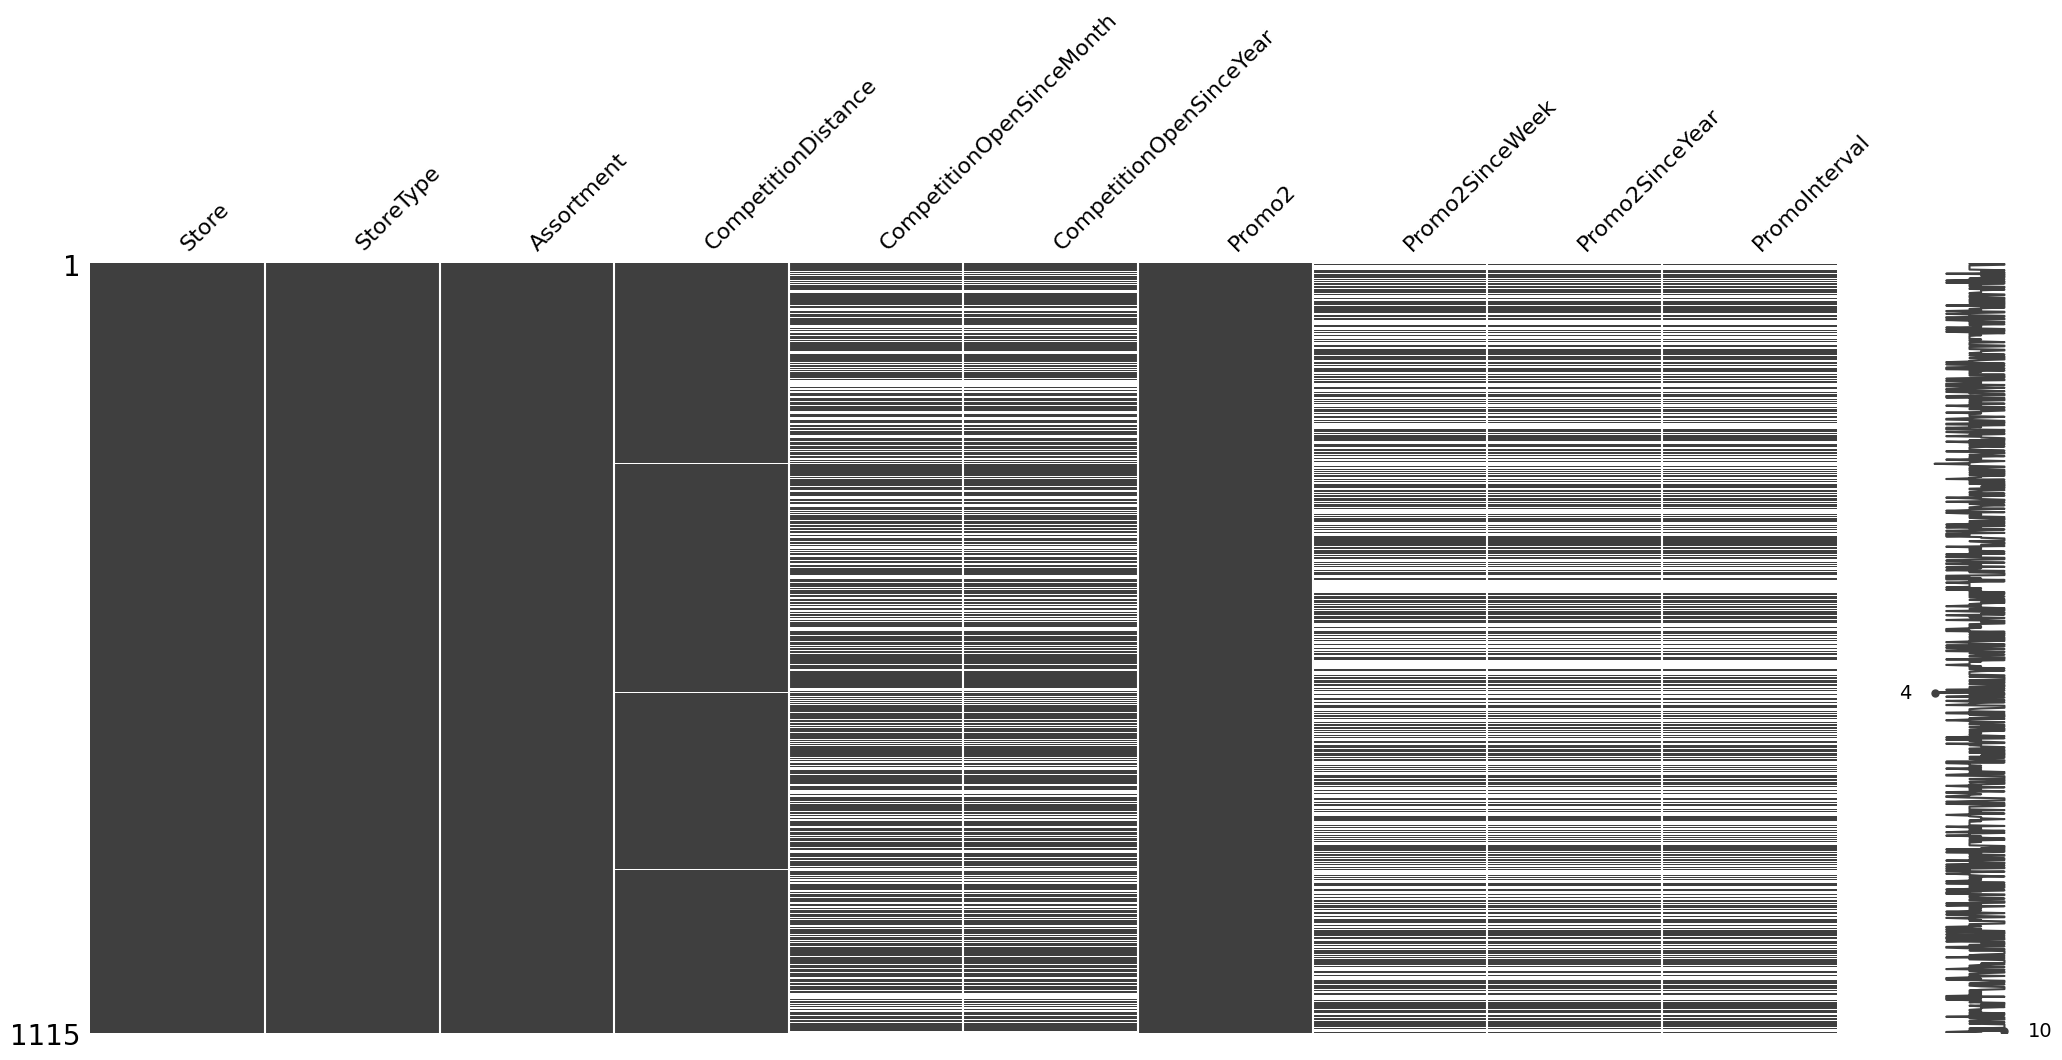

In [17]:
# Visualizing the missing values of store dataset
plt.figure(figsize=(8,6))
msno.matrix(store)

### What did you know about your dataset?

There are 2 dataset, viz. rossman and store. Rossman datset have 1017209 Rows and 9 Columns and store datset have 1115 rows and 10 columns. There are 0 null values and 0 duplicated values in rossman and few null and 0 duplicated values in store dataset.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
rossman_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
rossman_store.describe(include='all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [21]:
# Dataset Describe
store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

### Variables Description

**Store:** A unique identifier for each store.

**DayOfWeek:** The day of the week (1-7, where 1 represents Sunday and 7 represents Saturday).

**Date:** The date of the sales data.

**Sales:** The amount of sales on a particular day for a specific store.

**Customers:** The number of customers on a particular day for a specific store.

**Open:** A binary variable indicating whether the store was open (1) or closed (0) on a particular day.

**Promo:** A binary variable indicating whether a promotion was active (1) or not (0) on a particular day.

**StateHoliday:** A categorical variable indicating if the day was a state holiday (a, b, c) or not (0).

**SchoolHoliday:** A binary variable indicating if it was a school holiday (1) or not (0).

**StoreType:** The type of store (categorical variable).

**Assortment:** The assortment level of the store (categorical variable).

**CompetitionDistance:** The distance to the nearest competitor store.

**CompetitionOpenSinceMonth:** The month when the nearest competitor store opened.

**CompetitionOpenSinceYear:** The year when the nearest competitor store opened.

**Promo2:** A binary variable indicating whether the store is participating in a continuing promotion (1) or not (0).

**Promo2SinceWeek:** The calendar week when the store started participating in Promo2.

**Promo2SinceYear:** The year when the store started participating in Promo2.

**PromoInterval:** The intervals at which Promo2 is started, indicating the consecutive months the promotion is active.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable of rossman_store dataset.
for var in rossman_store.columns:
  unique_count=rossman_store[var].nunique()
  print(f'{var}',unique_count)
  if unique_count<=5:
    print(f'uniques values in {var} are',rossman_store[var].unique())



Store 1115
DayOfWeek 7
Date 942
Sales 21734
Customers 4086
Open 2
uniques values in Open are [1 0]
Promo 2
uniques values in Promo are [1 0]
StateHoliday 5
uniques values in StateHoliday are ['0' 'a' 'b' 'c' 0]
SchoolHoliday 2
uniques values in SchoolHoliday are [1 0]


In [23]:
# Check Unique Values for each variable of store dataset.
for va in store.columns:
  unique_count=store[va].nunique()
  print(f'{va}',unique_count)
  if unique_count<=5:
    print(f'unique values in {va} are',store[va].unique())

Store 1115
StoreType 4
unique values in StoreType are ['c' 'a' 'd' 'b']
Assortment 3
unique values in Assortment are ['a' 'c' 'b']
CompetitionDistance 654
CompetitionOpenSinceMonth 12
CompetitionOpenSinceYear 23
Promo2 2
unique values in Promo2 are [0 1]
Promo2SinceWeek 24
Promo2SinceYear 7
PromoInterval 3
unique values in PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Filling null values in store dataset with mean,median or 0.
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean(),inplace=True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean(),inplace=True)

In [25]:
store['Promo2SinceWeek'].fillna(0,inplace=True)
store['Promo2SinceYear'].fillna(0,inplace=True)
store['PromoInterval'].fillna(0,inplace=True)

In [26]:
rossman_store['StateHoliday']=rossman_store['StateHoliday'].replace(0,'0')
rossman_store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [27]:
# Merging both the Dataset.
final=pd.merge(rossman_store,store,on='Store',how='left')

In [28]:
final.sample(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
649262      3          2  2013-11-26   5880        733     1      0   
369197     57          1  2014-08-11   6835        740     1      0   
655947   1113          4  2013-11-21   7539        851     1      1   
669904    575          5  2013-11-08   5653        522     1      1   
266353     64          6  2014-11-29  11101        853     1      0   
38588     679          6  2015-06-27   7797        813     1      0   
679624    260          3  2013-10-30   5949        871     1      0   
846909    295          7  2013-06-02      0          0     0      0   
745129   1095          1  2013-09-02   4200        635     1      0   
817787    163          5  2013-06-28   6253        814     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
649262            0              0         a          a              14130.0   
369197            0              1         d          c                420.0   
655947            0              0         a          c               9260.0   
669904            0              0         a          a                960.0   
266353            0              0         d          c              22560.0   
38588             0              0         a          a               4140.0   
679624            0              0         a          a                540.0   
846909            0              0         a          a                210.0   
745129            0              0         a          a                690.0   
817787            0              1         a          a               1480.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
649262                  12.000000               2006.000000       1   
369197                   6.000000               2014.000000       0   
655947                   7.224704               2008.668857       0   
669904                   5.000000               2008.000000       1   
266353                   7.224704               2008.668857       1   
38588                    9.000000               2012.000000       0   
679624                  10.000000               2011.000000       0   
846909                  11.000000               2000.000000       1   
745129                   6.000000               2007.000000       1   
817787                   4.000000               2009.000000       0   

        Promo2SinceWeek  Promo2SinceYear     PromoInterval  
649262             14.0           2011.0   Jan,Apr,Jul,Oct  
369197              0.0              0.0                 0  
655947              0.0              0.0                 0  
669904             13.0           2010.0   Jan,Apr,Jul,Oct  
266353             14.0           2013.0   Jan,Apr,Jul,Oct  
38588               0.0              0.0                 0  
679624              0.0              0.0                 0  
846909             36.0           2013.0  Mar,Jun,Sept,Dec  
745129             14.0           2011.0   Jan,Apr,Jul,Oct  
817787              0.0              0.0                 0

In [29]:
final.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.017209e+06   
mean   3.815145e-01   1.786467e-01         5.422021e+03   
std    4.857586e-01   3.830564e-01         7.706918e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.325000e+03   
75%    1.000000e+00   0.000000e+00         6.880000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count               1.017209e+06              1.017209e+06  1.017209e+06   
mean                7.223450e+00              2.008683e+03  5.005638e-01   
std                 2.652674e+00              4.949376e+00  4.999999e-01   
min                 1.000000e+00              1.900000e+03  0.000000e+00   
25%                 6.000000e+00              2.008000e+03  0.000000e+00   
50%                 7.224704e+00              2.008669e+03  1.000000e+00   
75%                 9.000000e+00              2.011000e+03  1.000000e+00   
max                 1.200000e+01              2.015000e+03  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count     1.017209e+06     1.017209e+06  
mean      1.164767e+01     1.007011e+03  
std       1.532393e+01     1.005877e+03  
min       0.000000e+00     0.000000e+00  
25%       0.000000e+00     0.000000e+00  
50%       1.000000e+00     2.009000e+03  
75%       2.200000e+01     2.012000e+03  
max       5.000000e+01     2.015000e+03

In [30]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [31]:
final['Date']=pd.to_datetime(final['Date'],format='%Y-%m-%d')

In [32]:
final['CompetitionDistance']=final['CompetitionDistance'].astype(int)

In [33]:
final['CompetitionOpenSinceMonth']=final['CompetitionOpenSinceMonth'].astype(int)

In [34]:
final['CompetitionOpenSinceYear']=final['CompetitionOpenSinceYear'].astype(int)

In [35]:
final['Promo2SinceYear']=final['Promo2SinceWeek'].astype(int)
final['Promo2SinceWeek']=final['Promo2SinceWeek'].astype(int)

In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [37]:
df=final.copy()

In [38]:
dependent_var=df['Sales']

In [39]:
num_var=df.describe().drop('Sales',axis=1).columns
num_var

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [40]:
cat_var=df.describe(include=['object']).columns
cat_var

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

### What all manipulations have you done and insights you found?

I have merged both the dataset i.e. rossman and store into final and then made a copy of this dataset to df. Filled the null values with mean,mode,median and some with 0 as required. Converted the date column from dtype-object to datetime and some columns from float to int dtype.Finally the numerical and categorical columns are stored in the respective variables.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#Q1.How does the total sales vary across different days of the week? Are there any specific days that consistently exhibit higher or lower sales?



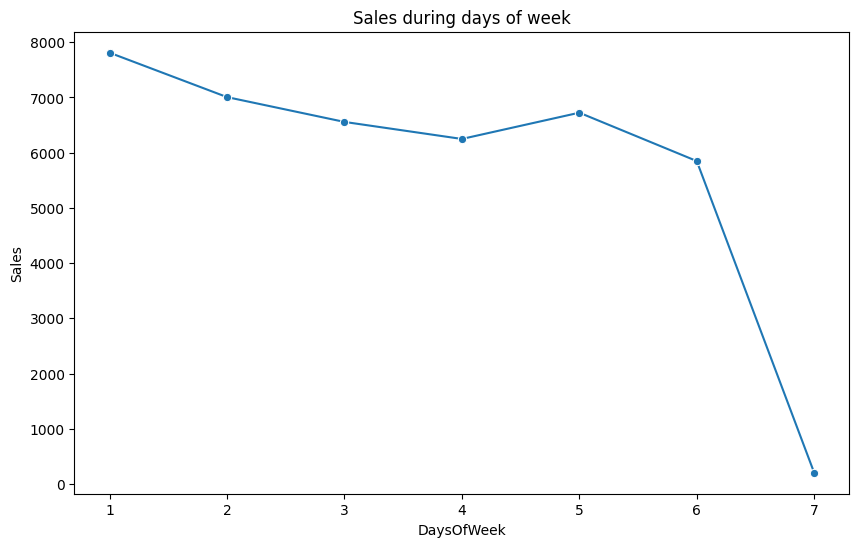

In [41]:
# Chart - 1 visualization code
fig=plt.figure(figsize=(10,6))
cal=df.groupby('DayOfWeek')['Sales'].mean()
sns.lineplot(x=cal.index,y=cal.values,marker='o')
plt.xlabel('DaysOfWeek')
plt.ylabel('Sales')
plt.title('Sales during days of week');
plt.show()

##### 1. Why did you pick the specific chart?

The line plot is suitable for visualizing the trend or pattern of a continuous variable. It helps in understanding how average sales vary across different days of the week and if there are any noticeable patterns or trends.
It allows for a quick visual analysis and helps in identifying any day-of-week patterns in sales.

##### 2. What is/are the insight(s) found from the chart?

The average sales during DayOfWeek 1 (Sunday) and DayOfWeek 7 (Saturday) are the highest, indicating higher sales on weekends. DayOfWeek 6 (Friday) has the lowest average sales, suggesting lower sales on that day compared to the other days of the week. This information highlights the pattern of higher sales on weekends (Sunday and Saturday) and comparatively lower sales on weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis, such as higher average sales on weekends and lower average sales on Fridays, can help create a positive business impact. By allocating resources and implementing targeted marketing strategies during weekends, businesses can capitalize on increased sales potential. However, failure to adapt to these patterns may result in missed revenue opportunities and potential negative growth.

#### Chart - 2
#Q2-How does the sales vary across different storetypes?

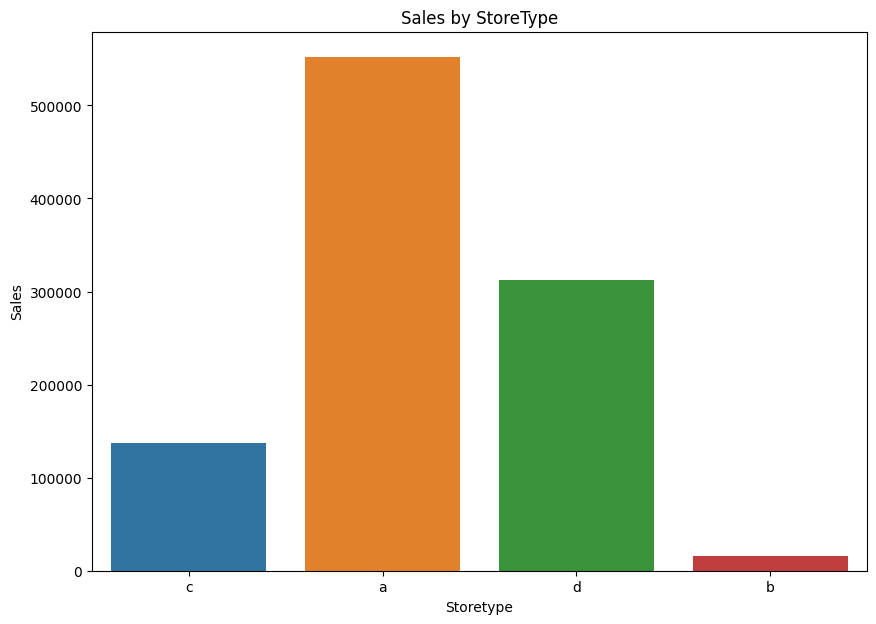

In [42]:
# Chart - 2 visualization code
fig=plt.figure(figsize=(10,7))
sns.countplot(x='StoreType',data=df)
plt.xlabel('Storetype')
plt.ylabel('Sales')
plt.title('Sales by StoreType')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is suitable for visualizing the frequency or count of categorical variables.The chart aims to show the distribution of different store types and the frequency of each store type in the dataset.
The countplot is a suitable choice for this scenario as it effectively displays the count or frequency of categorical data, allowing for quick comparisons and insights into the distribution of store types.

##### 2. What is/are the insight(s) found from the chart?

Storetype A has the largest count, indicating that it is the most common type of store in the dataset.
Storetype D and C have relatively high counts, suggesting that they are also popular store types.
Storetype B has the lowest count among the store types, indicating that it is the least common type of store in the dataset.
The difference in counts between Storetype A and the other store types suggests that Storetype A may have a larger presence or market share compared to the other types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. By understanding the distribution and popularity of different store types, businesses can tailor their strategies to capitalize on the strengths and opportunities associated with each store type.

However, one potential insight that could lead to negative growth is if Storetype B has significantly lower sales compared to the other store types. This could indicate that Storetype B is less appealing to customers or facing challenges in attracting sales.

#### Chart - 3
#Q3-How does the average sales and customers vary when it is a stateholiday or schoolholiday?

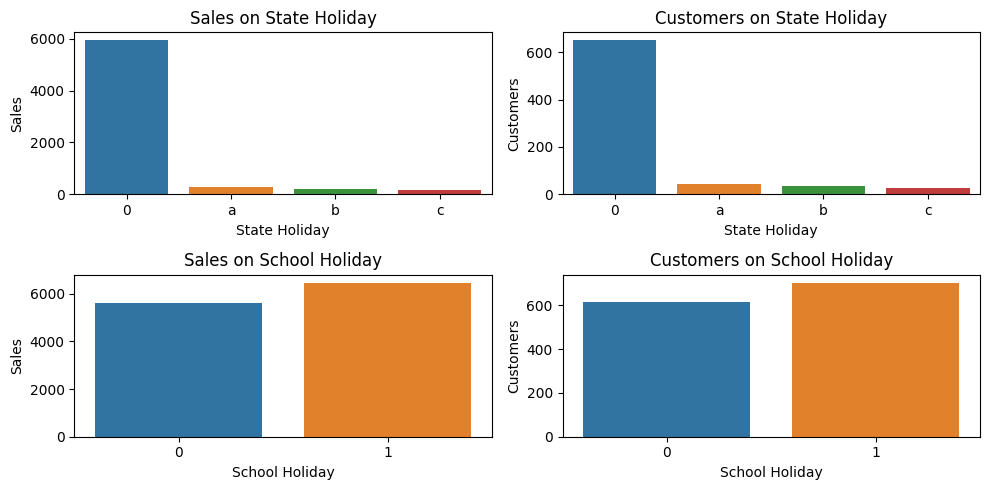

In [43]:
# Chart - 3 visualization code
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

cal_ssh = df.groupby('StateHoliday')['Sales'].mean()
sns.barplot(x=cal_ssh.index, y=cal_ssh.values, ax=axes[0, 0])
axes[0, 0].set_title('Sales on State Holiday')
axes[0, 0].set_xlabel('State Holiday')
axes[0, 0].set_ylabel('Sales')

cal_csh = df.groupby('StateHoliday')['Customers'].mean()
sns.barplot(x=cal_csh.index, y=cal_csh.values, ax=axes[0, 1])
axes[0, 1].set_title('Customers on State Holiday')
axes[0, 1].set_xlabel('State Holiday')
axes[0, 1].set_ylabel('Customers')

cal_ssch = df.groupby('SchoolHoliday')['Sales'].mean()
sns.barplot(x=cal_ssch.index, y=cal_ssch.values, ax=axes[1, 0])
axes[1, 0].set_title('Sales on School Holiday')
axes[1, 0].set_xlabel('School Holiday')
axes[1, 0].set_ylabel('Sales')

cal_csch = df.groupby('SchoolHoliday')['Customers'].mean()
sns.barplot(x=cal_csch.index, y=cal_csch.values, ax=axes[1, 1])
axes[1, 1].set_title('Customers on School Holiday')
axes[1, 1].set_xlabel('School Holiday')
axes[1, 1].set_ylabel('Customers')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

By arranging the plots in a grid, it becomes easier to observe and compare the bar heights across different categories and variables. This layout helps in gaining insights into how sales and customer behavior vary during state holidays and school holidays.

The choice of bar plots is appropriate for this scenario as they effectively display the mean or aggregated values of a continuous variable (sales/customers) for different categories (state holiday/school holiday). The bar plots enable easy visual comparison of the variable values and provide insights into any differences or patterns observed across the holiday categories.

Overall, the combination of bar plots in a grid layout is suitable for this analysis, allowing for a comprehensive examination of sales and customer behavior during state holidays and school holidays.

##### 2. What is/are the insight(s) found from the chart?

Sales on State Holidays: The average sales on State Holidays are lower compared to non-State Holidays. This suggests that State Holidays have a negative impact on sales.

Customers on State Holidays: The average number of customers on State Holidays is also lower compared to non-State Holidays. This indicates that State Holidays attract fewer customers to the stores.

Sales on School Holidays: The average sales on School Holidays are higher compared to non-School Holidays. This implies that School Holidays have a positive impact on sales.

Customers on School Holidays: The average number of customers on School Holidays is also higher compared to non-School Holidays. This further supports the notion that School Holidays lead to increased customer visits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that School Holidays lead to higher sales and customer engagement can have a positive impact on business growth. By leveraging these periods with targeted marketing strategies, businesses can attract more customers and increase sales.

On the other hand, the insight that State Holidays result in lower sales and customer numbers may have a negative impact on business growth. Businesses should be aware of these slower days and adjust their operations and marketing efforts accordingly.

Overall, understanding the impact of different types of holidays on sales and customer behavior allows businesses to optimize their strategies and resource allocation, leading to positive business outcomes.

#### Chart - 4
#Q4-How does the Sales and Customers vary due to Promo?

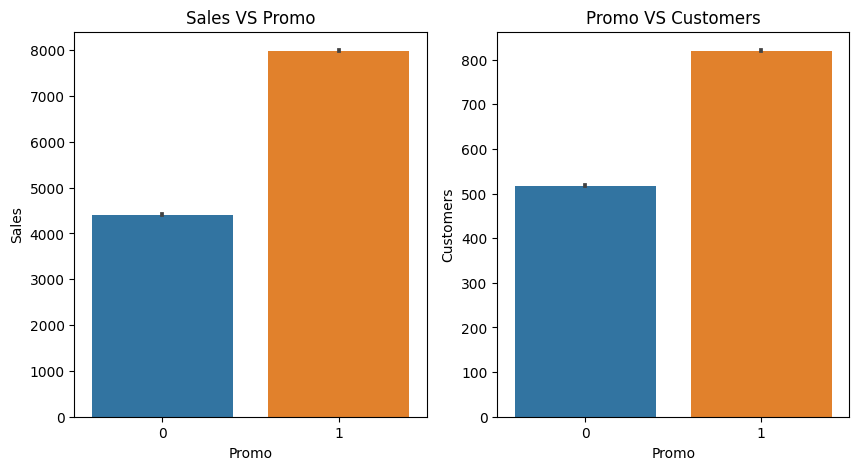

In [44]:
# Chart - 4 visualization code
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Promo',y='Sales',data=df,ax=axis1)
axis1.title.set_text('Sales VS Promo')
sns.barplot(x='Promo',y='Customers',data=df,ax=axis2)
axis2.title.set_text('Promo VS Customers')

##### 1. Why did you pick the specific chart?

The bar plots are suitable for comparing the mean or aggregated values of a continuous variable (sales/customers) across different categories (promo/non-promo).

The choice of bar plots is appropriate for this scenario as they effectively display the mean values of the variables for each category of the "Promo" variable. The bar plots allow for a clear visual comparison of the variable values and provide insights into any differences or patterns observed between the promo and non-promo periods.

Overall, the combination of horizontal bar plots is suitable for this analysis, allowing for a straightforward comparison of sales and customer behavior during promo and non-promo periods.

##### 2. What is/are the insight(s) found from the chart?

Sales tend to be higher on days when there is a promotion (Promo = 1) compared to days without a promotion (Promo = 0).
The presence of a promotion also leads to an increase in the number of customers visiting the store.
Promotional activities have a positive impact on both sales and customer engagement, indicating that promotions are effective in attracting customers and driving sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart suggest that implementing promotions can help create a positive business impact. Promotions are associated with higher sales and increased customer engagement, indicating that they can drive business growth and attract more customers to the store.

#### Chart - 5
#Q5-How does the Sales vary across different storetypes and assortments?

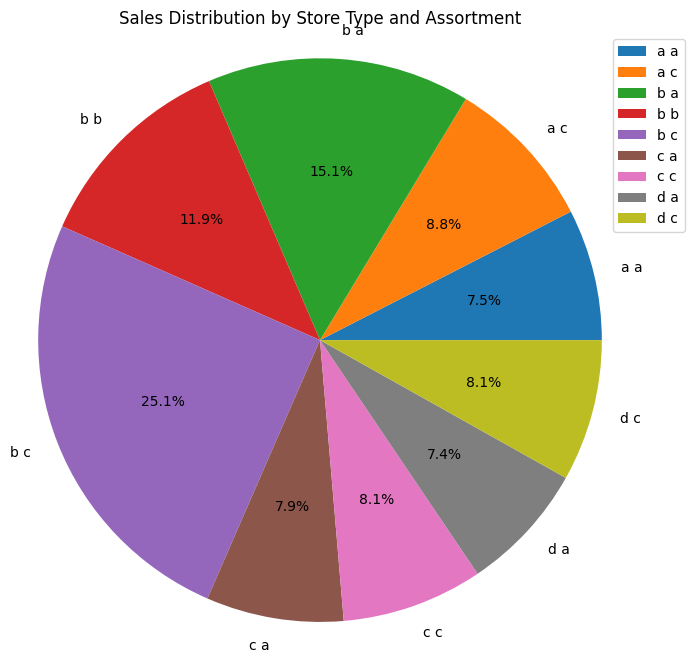

In [45]:
# Chart - 5 visualization code
var = df.groupby(['StoreType', 'Assortment'])['Sales'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(var['Sales'], labels=var['StoreType'] + ' ' + var['Assortment'], autopct='%1.1f%%')
plt.title('Sales Distribution by Store Type and Assortment')
plt.axis('equal')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart is selected to represent the distribution of sales across different combinations of store types and assortments.

The pie chart allows for a visual representation of the proportion of sales contributed by each store type and assortment combination. Each combination is represented as a slice in the pie chart, with the size of the slice indicating the percentage of sales it contributes to the total. The labels on the slices provide information about the specific store type and assortment combination.

The chart provides insights into the sales distribution among different store types and assortments, enabling the identification of any dominant or significant combinations.

##### 2. What is/are the insight(s) found from the chart?

The store type "b" with assortment "c" has the highest percentage of sales, indicating that this combination is the most successful in generating sales.

Assortment "a" and "c" contributes to a significant portion of sales across all store types.

Store types "d" and "a" with assortment "a" have the lowest percentage of sales, suggesting that this combination may be less preferred by customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by identifying successful combinations that contribute to higher sales. By focusing on these successful combinations, businesses can optimize their strategies and allocate resources accordingly to maximize their sales potential.

On the other hand, insights revealing lower sales in certain combinations can serve as indicators of potential areas for improvement. By analyzing the factors contributing to these negative growth patterns, businesses can identify underlying issues and implement targeted solutions to address them.

#### Chart - 6
#How does the Sales vary by CompetitionDistance?

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

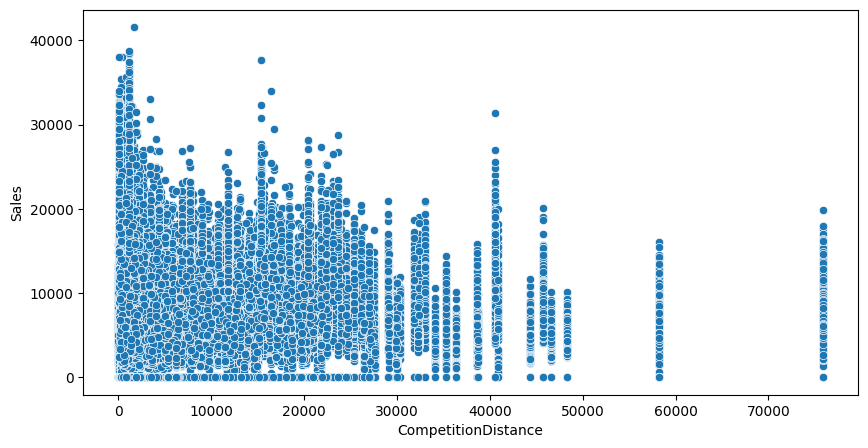

In [46]:
# Chart - 6 visualization code
fig=plt.figure(figsize=(10,5))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

The scatter plot is selected to visualize the relationship between the competition distance and sales.

A scatter plot is suitable for this scenario as it allows us to examine the distribution and correlation between two continuous variables, in this case, the competition distance and sales. Each data point represents a store, with the competition distance on the x-axis and the corresponding sales on the y-axis.

By plotting the data points on a scatter plot, we can observe any patterns, trends, or outliers in the relationship between competition distance and sales. It helps in identifying whether there is a positive, negative, or no correlation between the two variables.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, we can observe that there is no clear linear relationship between the competition distance and sales. The data points are scattered across the plot, indicating that the competition distance alone may not be a strong predictor of sales.

However, we can still gain some insights from the visualization. We can see that there is a concentration of data points around lower competition distances, suggesting that stores located closer to their competitors tend to have higher sales. This could be attributed to factors such as convenience and customer preference for clustered shopping areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can potentially have a positive business impact by informing decisions related to store location and competition. However, there are no specific insights that directly indicate negative growth.

#### Chart - 7
#What is the relation between store oppenness and Sales?

<Axes: xlabel='Open', ylabel='Sales'>

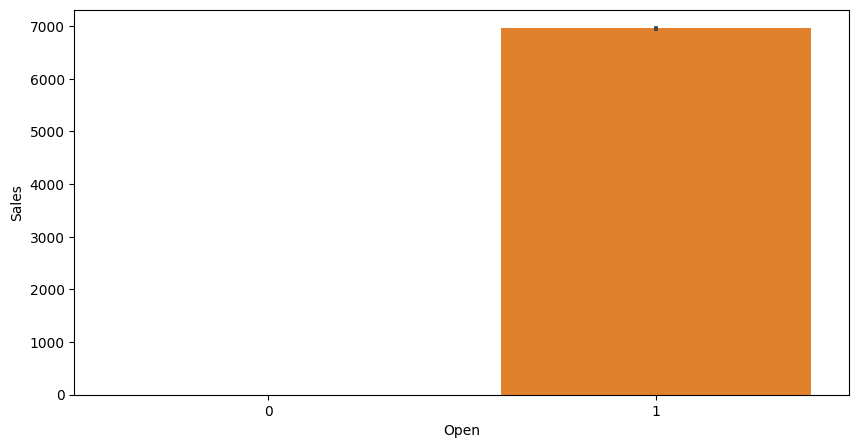

In [47]:
# Chart - 7 visualization code
fig=plt.figure(figsize=(10,5))
sns.barplot(x='Open',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

The bar plot is selected to visualize the relationship between the "Open" variable and sales.

By using a bar plot, we can easily compare the average sales between open and closed stores. It helps in understanding whether the store being open or closed has an impact on sales. The height of each bar represents the average sales for the corresponding category, allowing for a clear visual comparison.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot, we can observe that the sales are significantly higher when the store is open compared to when it is closed. This suggests that the store being open has a positive impact on sales.And also this clearly was to check foe the outlier detection. As sales when the store is closed is clearly an outlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight gained from the chart that shows higher sales when the store is open can help create a positive business impact. By ensuring that the store is open during peak sales periods and optimizing store hours, the business can maximize sales and revenue.

#### Chart - 8
#Checking the Distribution of the dependent variable i.e. Sales.

<Axes: xlabel='Sales', ylabel='Density'>

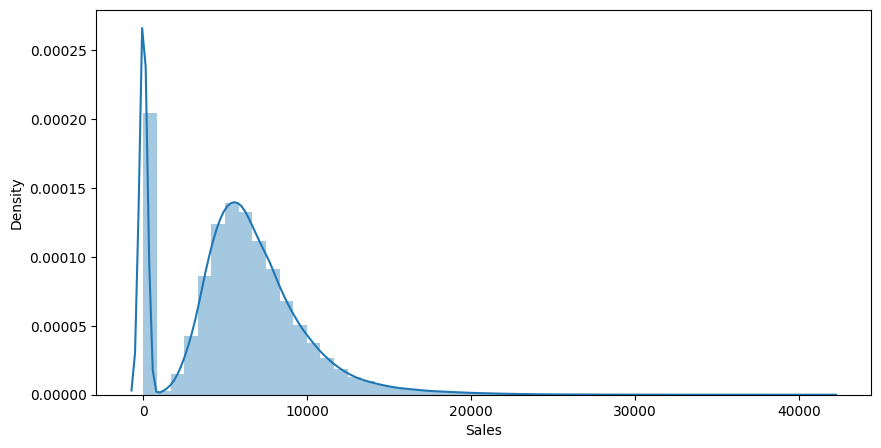

In [48]:
# Chart - 8 visualization code
fig=plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])

##### 1. Why did you pick the specific chart?

The histogram is selected to visualize the distribution of the "Sales" variable.

The x-axis represents the range of sales values, and the y-axis represents the frequency or count of occurrences.

By using a histogram, we can observe the shape of the distribution, identify any patterns or clusters in the data, and get an idea of the central tendency and spread of the sales values. It helps in understanding the overall distribution of sales and detecting any outliers or unusual patterns.

Additionally, the histogram can provide insights into the skewness or asymmetry of the sales distribution. Skewness can indicate whether the sales values are concentrated towards one end of the distribution or evenly distributed.

##### 2. What is/are the insight(s) found from the chart?

There are two peaks in the distribution which indicated that the data has two clusters.The first peak is concentrated at 0 that indicates a high number of shops were closed and had 0 sales.

The sales data is positively skewed, with a longer right tail. This indicates that there are relatively few instances of high sales values, while most sales values are concentrated towards the lower end.

The majority of sales fall within a certain range, as evidenced by the peak in the distribution. This suggests that there may be some common sales patterns or trends that influence the majority of the sales data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the sales distribution can potentially help create a positive business impact. By understanding the distribution and characteristics of sales data, businesses can make informed decisions to optimize their strategies and drive growth. For example, identifying the presence of two clusters in the data allows businesses to differentiate between closed shops and open shops, enabling them to focus on improving sales for open shops and addressing the reasons behind closed shops.

However, there is a potential insight that could lead to negative growth. The presence of a significant number of closed shops with zero sales indicates a potential issue or challenge that needs to be addressed. If a large portion of the stores consistently remain closed or have zero sales, it can negatively impact overall business performance. Therefore, it is important for businesses to investigate the reasons behind closed shops and take appropriate actions to minimize their occurrence and maximize sales opportunities.

#### Chart - 9
#Checking the relation between numerical variables and dependent variable.

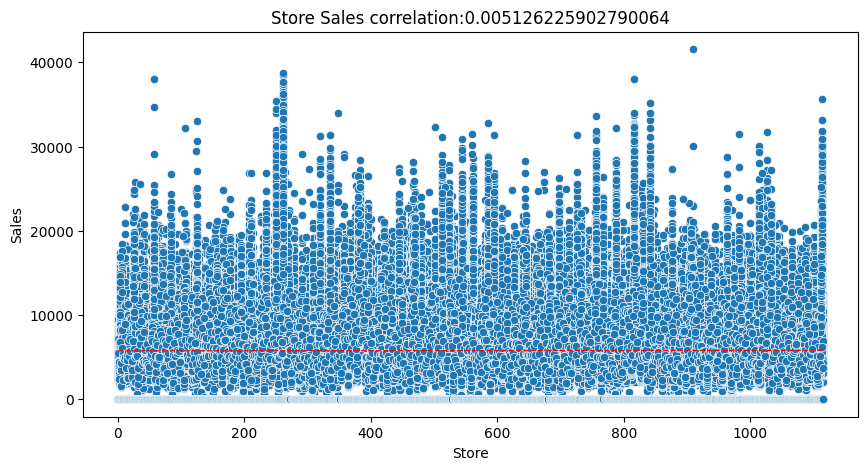

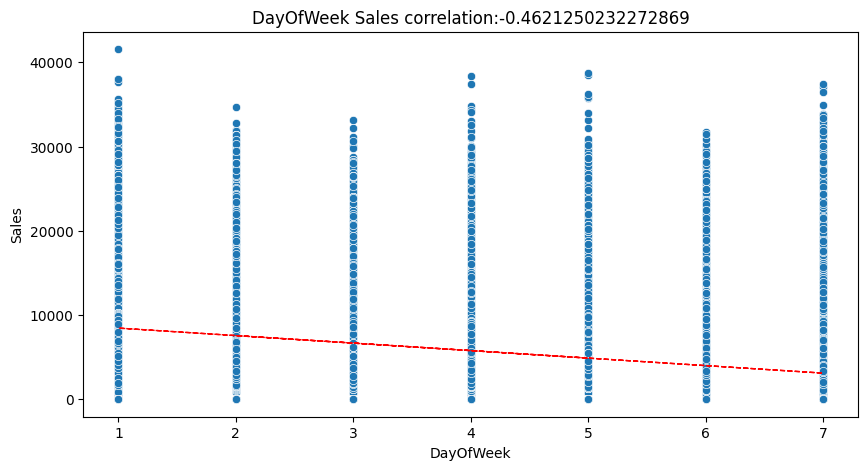

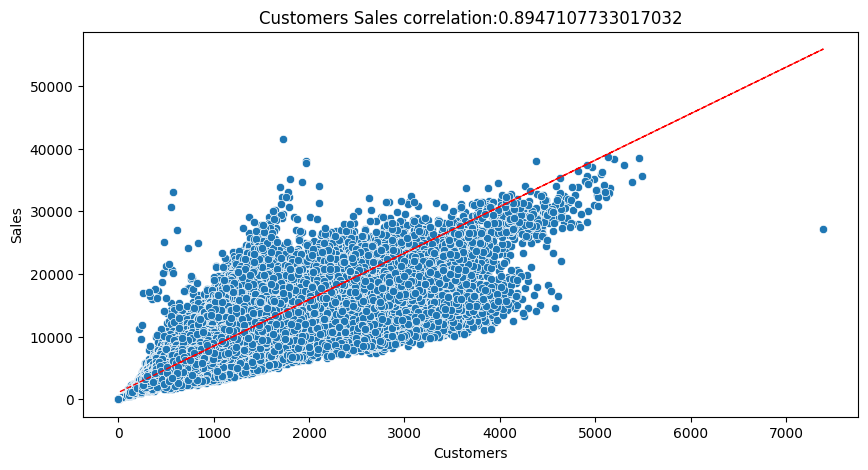

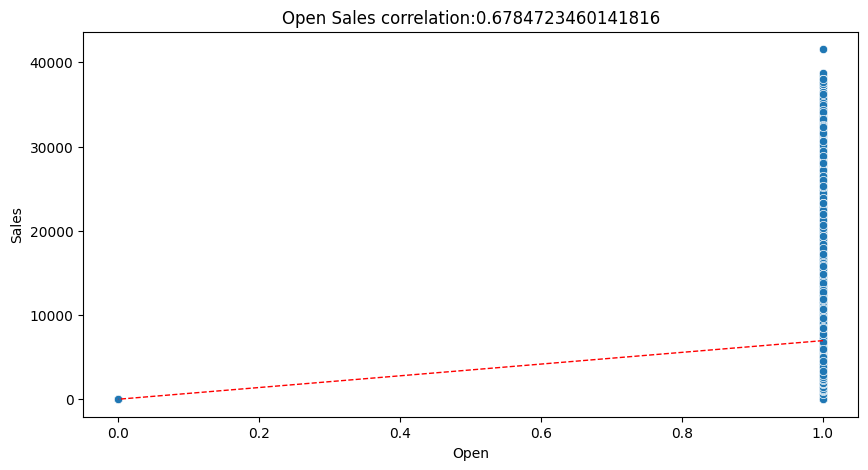

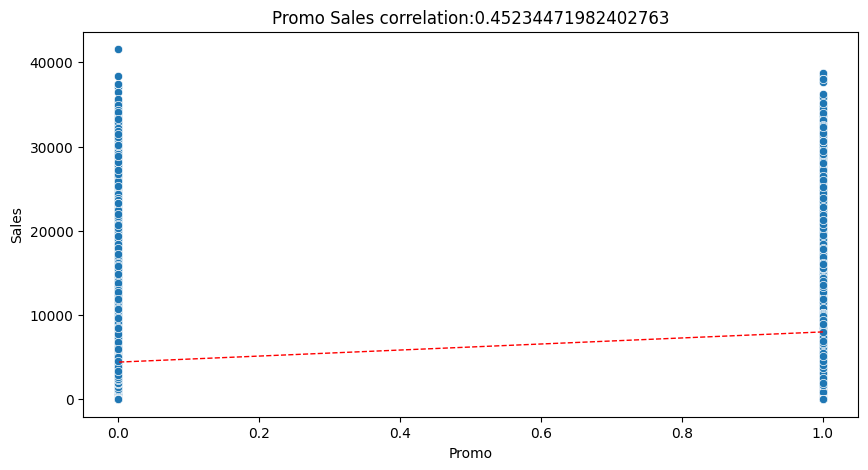

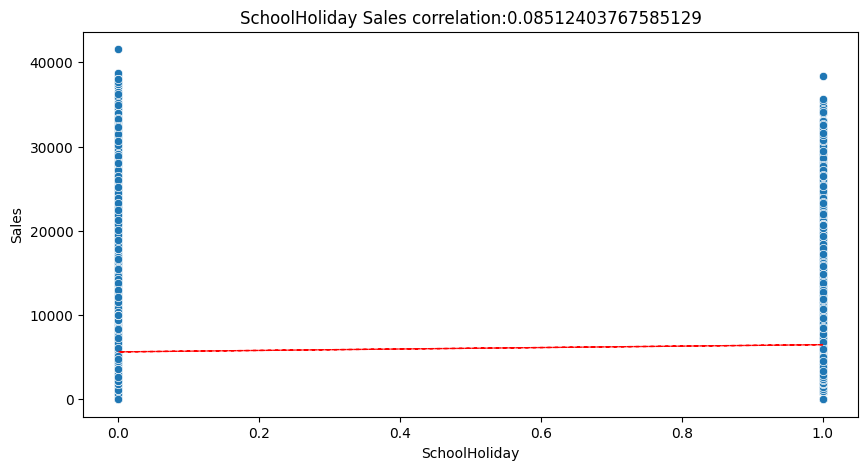

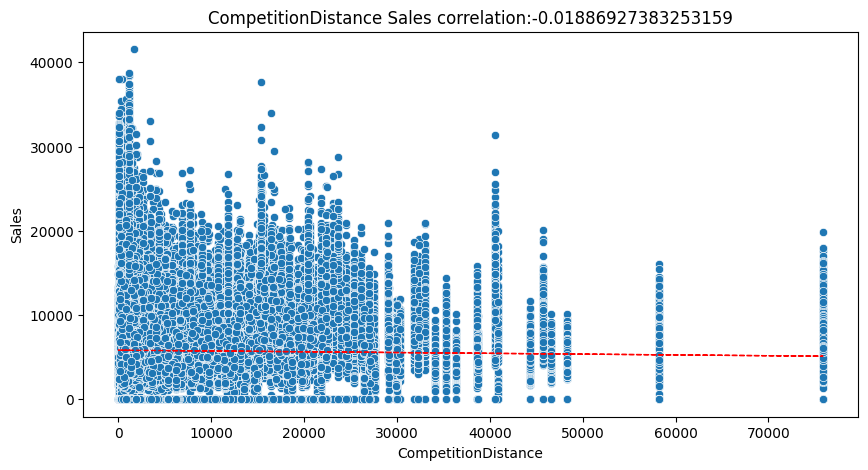

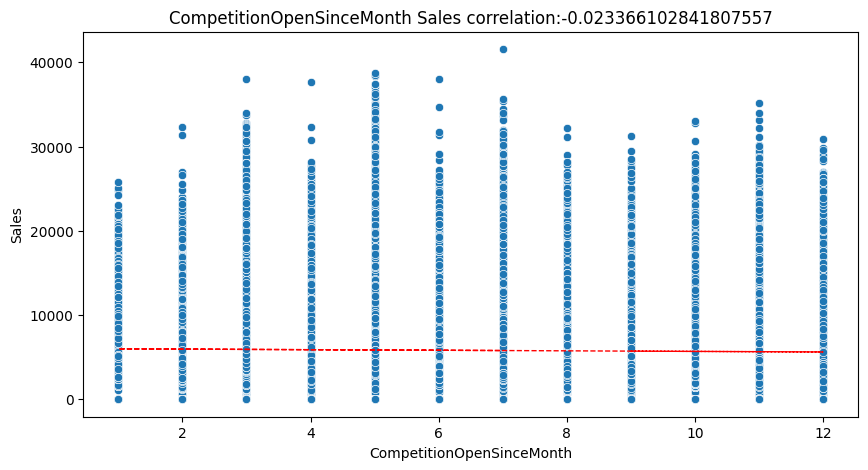

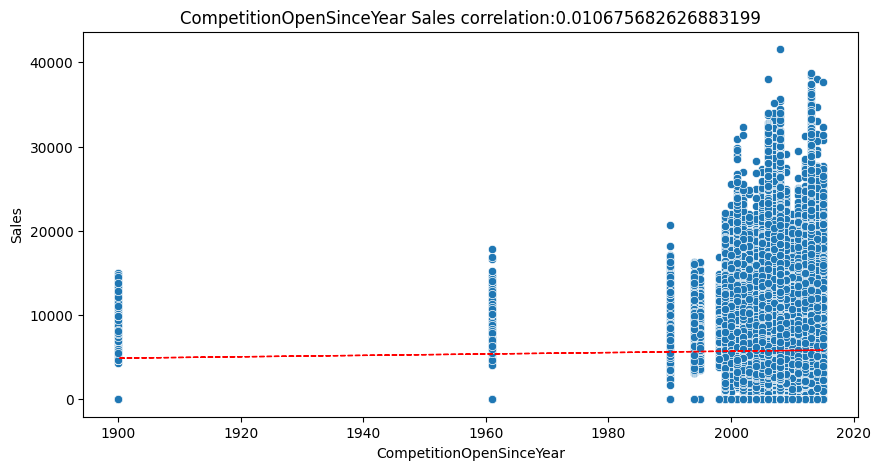

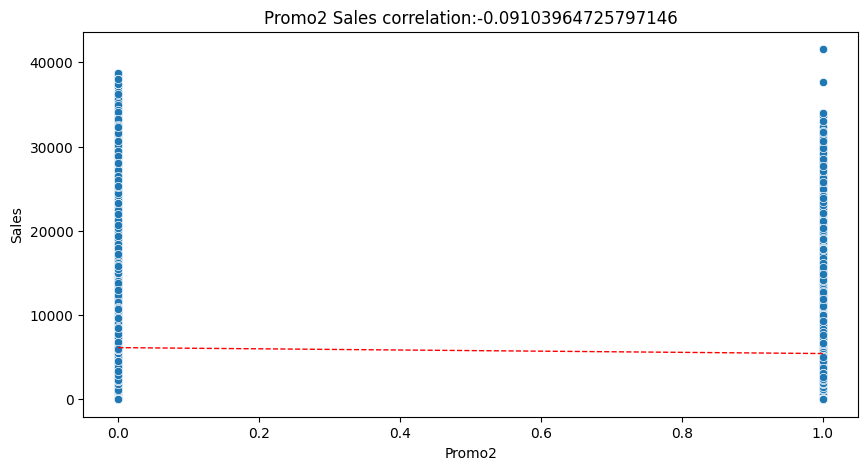

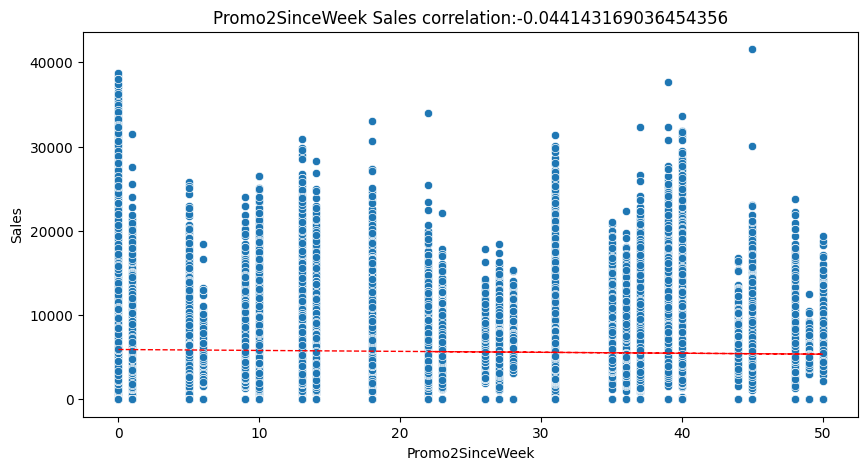

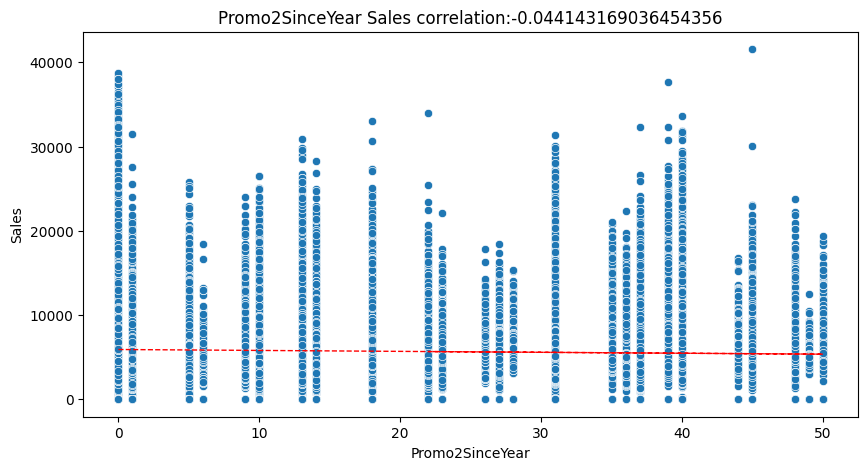

In [49]:
# Chart - 9 visualization code
for col in num_var:
  fig=plt.figure(figsize=(10,5))
  ax=fig.gca()
  feature=df[col]
  label=df['Sales']
  correlation=feature.corr(label)
  sns.scatterplot(x=feature,y=label)
  z=np.polyfit(df[col],df['Sales'],1)
  y_hat=np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title(col+' '+'Sales'+' correlation:'+str(correlation))
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in this case, which is a scatter plot with a regression line, was likely selected to visualize the relationship between each numeric variable and the "Sales" variable. Scatter plots are commonly used to examine the correlation or association between two continuous variables. By plotting the numeric variable on the x-axis and the "Sales" variable on the y-axis, the chart allows for a visual exploration of their relationship.

The regression line added to the scatter plot helps to estimate the linear relationship between the variables. It provides information about the direction (positive or negative) and the slope of the relationship. This can help identify whether there is a positive or negative correlation between the numeric variable and "Sales" and how strong the relationship might be.

Additionally, including the correlation coefficient in the title of each subplot provides a quantitative measure of the strength and direction of the linear relationship. This helps in understanding the degree to which the numeric variable and "Sales" are associated.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plots, we can observe the relationship between each numerical variable and the sales. Here are some insights that can be derived:

Customers: There is a positive correlation between the number of customers and sales. As the number of customers increases, the sales also tend to increase. This suggests that attracting more customers can potentially lead to higher sales.

CompetitionDistance: The correlation between competition distance and sales is relatively weak. The scatter plot does not show a clear linear relationship between these variables. However, there might be some non-linear or indirect relationships that need to be further explored.

Promo: When there is a promotion (Promo=1), there tends to be higher sales compared to when there is no promotion (Promo=0). This indicates that promotional activities have a positive impact on sales.

SchoolHoliday: The presence of a school holiday (SchoolHoliday=1) does not show a clear pattern in terms of its impact on sales. The scatter plot does not exhibit a significant correlation between these variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing valuable information about the relationships between different numerical variables and sales. These insights can guide businesses in making data-driven decisions to optimize their strategies and maximize sales. For example:

The positive correlation between the number of customers and sales suggests that focusing on customer acquisition and retention strategies can lead to increased sales.

The observation that promotions have a positive impact on sales indicates that businesses can leverage promotional activities to drive sales growth.

#### Chart - 10
#Analysis of categorical variable.

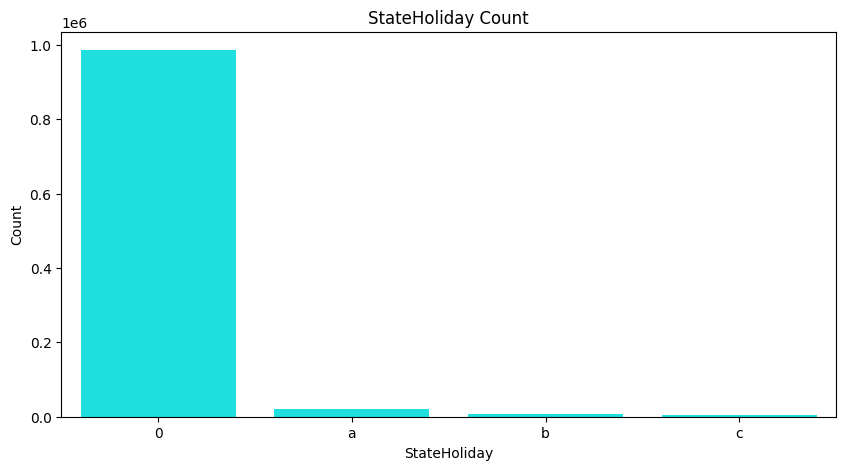

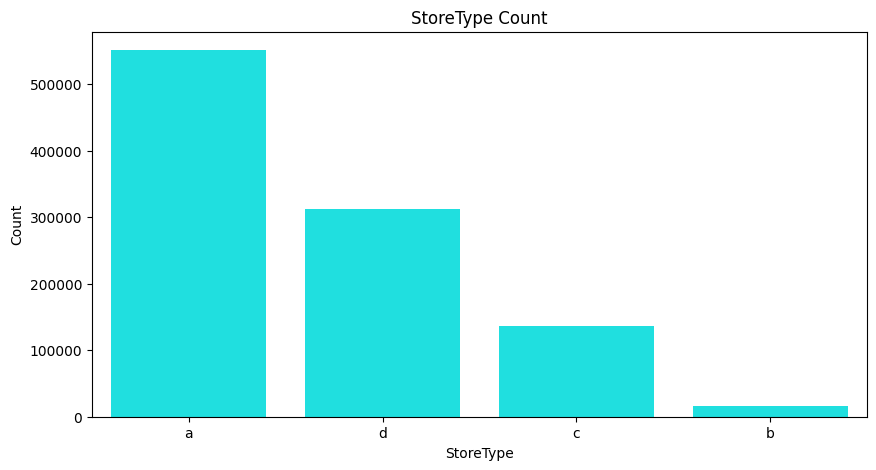

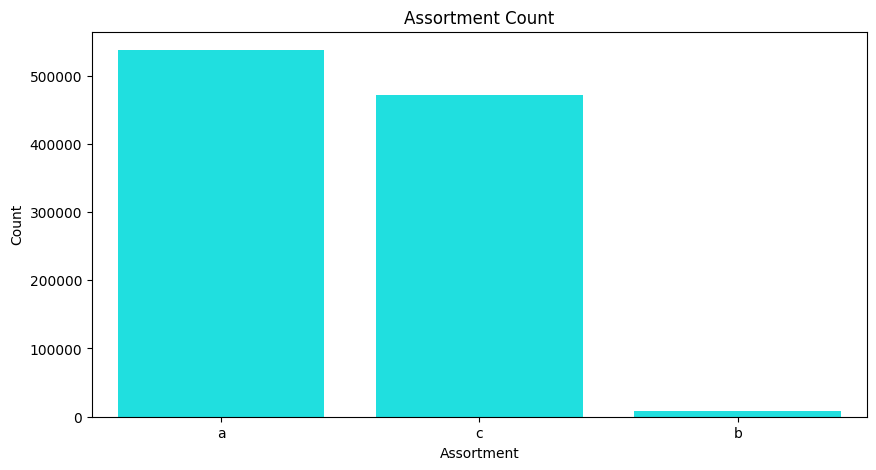

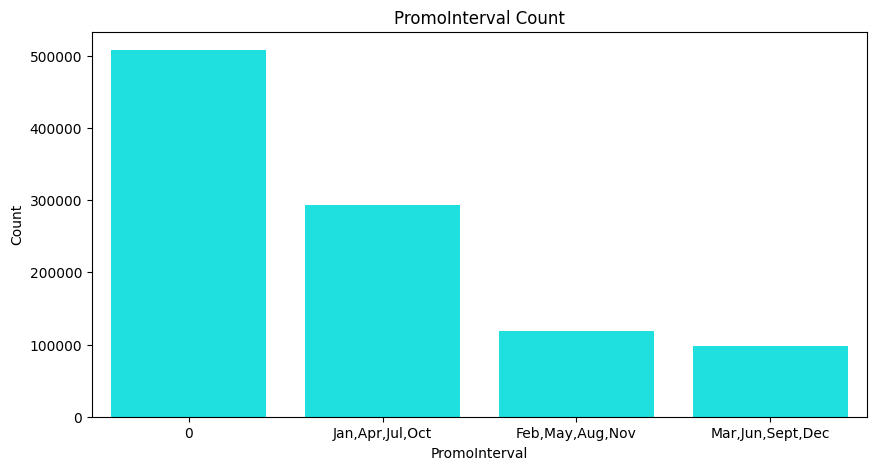

In [50]:
# Chart - 10 visualization code
for col in cat_var:
  fig=plt.figure(figsize=(10,5))
  counts=df[col].value_counts()
  ax=fig.gca()
  feature=df[col]
  sns.barplot(x=counts.index, y=counts.values, ax=ax, color='cyan')
  plt.xlabel(col)
  plt.ylabel('Count')
  ax.set_title(col + ' Count')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen in this case is a bar chart. The reason for choosing this chart is to visualize the count or frequency of different categories within each categorical variable. The bar chart provides a clear and concise representation of the distribution of categorical data, making it easy to compare the frequency of different categories.

In summary, the bar chart is chosen to visually represent the count or frequency of categories within categorical variables, enabling us to gain insights into the distribution and relative importance of different categories for further analysis.

##### 2. What is/are the insight(s) found from the chart?

StateHoliday: The highest count is observed for StateHoliday "0," indicating that the majority of days are not state holidays. Following that, the count decreases in the order of "a" type holiday, "b" type holiday, and "c" type holiday. This suggests that regular non-holiday days are the most common, while specific state holidays occur less frequently.

PromoInterval: The highest count is observed for PromoInterval "0," indicating that the majority of stores do not have a defined promotional interval. Among the stores with defined intervals, the months with the highest count are January, April, July, and October. This is followed by February, May, August, and November. The months with the least count are March, June, September, and December. This indicates that certain months are more favored for running promotions compared to others.

StoreType: Store type "a" has the highest count, indicating that there are more stores of this type in the dataset. This is followed by store types "d," "c," and "b." This suggests that store type "a" is the most prevalent, while store type "b" is the least common.

Assortment: The highest count is observed for assortment type "a," indicating that there are more stores offering this assortment type. This is followed by assortment type "b" and the least count is for assortment type "c." This suggests that assortment type "a" is more widely adopted by the stores in the dataset, while assortment type "c" is the least preferred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing valuable information about customer behavior, store operations, and promotional strategies.

Negative growth can occur if businesses fail to adapt to the insights or misinterpret them. For example:

StateHoliday: If a business neglects the impact of state holidays and fails to adjust its operations or promotions accordingly, it may miss out on potential sales opportunities during those periods. This can lead to negative growth compared to competitors who effectively leverage state holidays for increased sales.

PromoInterval: Failing to align promotional activities with the months of higher customer engagement (such as January, April, July, and October) may result in reduced effectiveness of promotions. Businesses should carefully plan and allocate resources to capitalize on these peak months to maximize sales potential.

StoreType and Assortment: Businesses should analyze the customer preferences and market demand for different store types and assortment types. Neglecting the market demand or failing to offer the preferred store type or assortment type may result in lower customer satisfaction and negative growth.

#### Chart - 11
#Total Sales done by each Store.

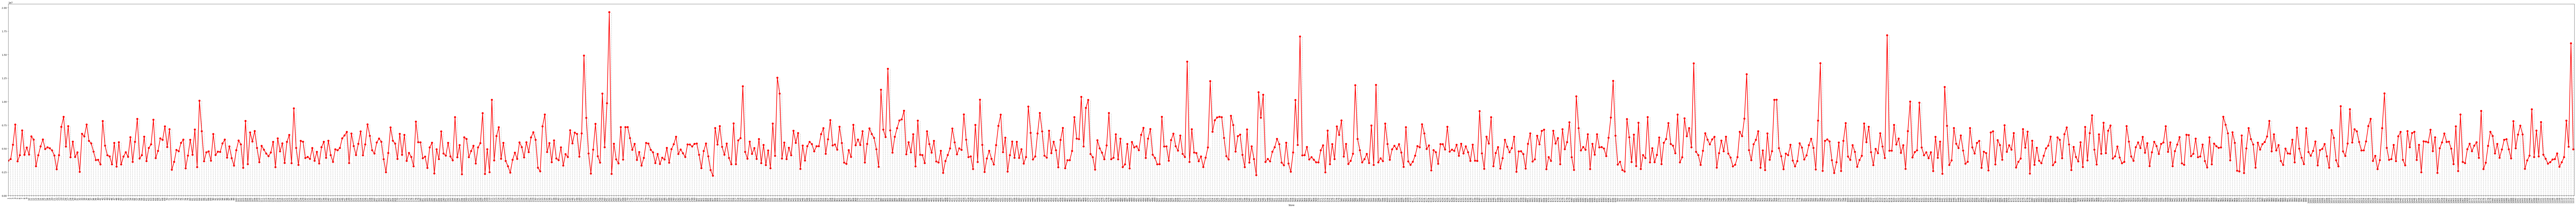

In [51]:
# Chart - 11 visualization code
fig=plt.figure(figsize=(200,15))
c=df.groupby('Store')['Sales'].sum()
ax=sns.pointplot(x=c.index,y=c.values,color='r')
plt.xticks(rotation=90);
ax.set_ylim(bottom=0)
ax.set_xlim(0)
ax.vlines(c.index,1, c.values, linestyles='dashed', colors='gray', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

The point plot allows us to plot the sales values for each store as individual points on the y-axis, with the corresponding store identifier (index) on the x-axis. This provides a clear representation of the total sales for each store, allowing for easy comparison and identification of stores with higher or lower sales.

The point plot also includes dashed vertical lines connecting each point to the x-axis, providing a visual reference to easily track the sales values for each store. This helps in understanding the distribution of sales across different stores and identifying any significant variations or patterns.

The large figure size (200,15) chosen for the plot ensures that the chart is displayed with an extended width, accommodating the potentially large number of store identifiers on the x-axis without overlapping or overcrowding. This enables better readability and interpretation of the sales distribution across stores.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, it can be observed that store 262 has the highest sales among all the stores. This indicates that store 262 is performing exceptionally well in terms of generating sales compared to other stores in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights, particularly the identification of store 262 as the top-performing store, can potentially help create a positive business impact. By analyzing the strategies and factors contributing to the success of store 262, other stores can learn from its best practices and implement similar strategies to improve their own sales performance. This benchmarking and targeted analysis can lead to positive growth by identifying effective approaches and implementing them across the business.

#### Chart - 14 - Correlation Heatmap

<Axes: >

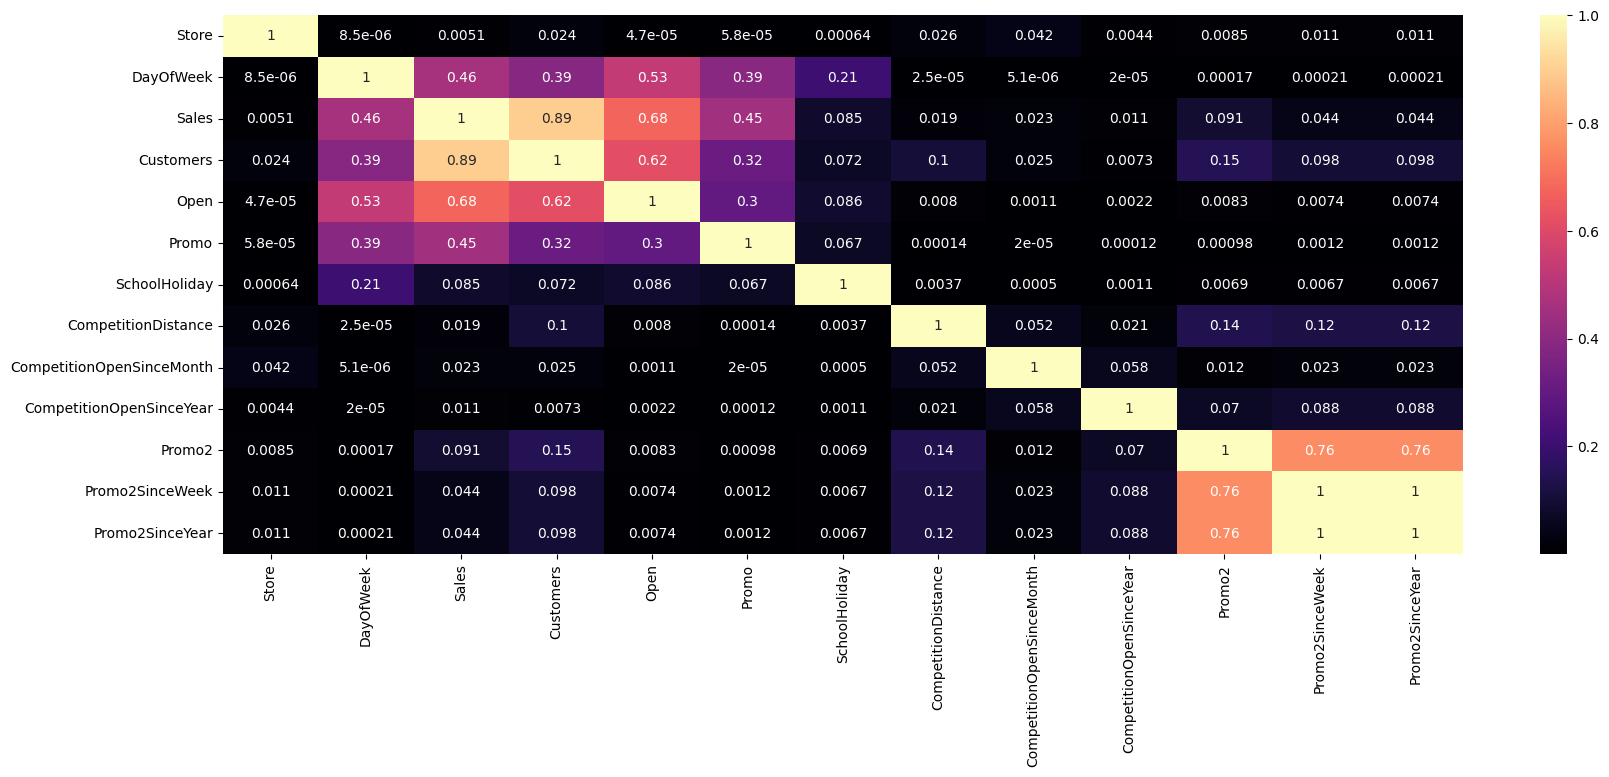

In [54]:
# Correlation Heatmap visualization code
fig=plt.figure(figsize=(20,7))
correlation=df.corr(numeric_only=True)
sns.heatmap(abs(correlation),annot=True,cmap='magma')

##### 1. Why did you pick the specific chart?

I picked the correlation heatmap chart because it is a useful visualization for understanding the relationships between numerical variables in the dataset. The heatmap allows us to quickly identify strong positive or negative correlations between variables. By using color-coded cells and annotations, it provides a clear and concise overview of the correlation values. This helps in identifying potential patterns or dependencies among variables, which can be valuable for making data-driven decisions and uncovering insights.

##### 2. What is/are the insight(s) found from the chart?

Sales and Customers: There is a strong positive correlation (0.89) between sales and the number of customers. This indicates that an increase in customer count is likely to result in higher sales.

Day of the Week and Sales: There is a moderate positive correlation (0.46) between the day of the week and sales. This suggests that certain days of the week may have a greater impact on sales.

Open and Sales: There is a strong positive correlation (0.68) between the opening status of the store and sales. This implies that when the store is open, sales tend to be higher.

Promo and Sales: There is a moderate positive correlation (0.45) between promotional activities and sales. This suggests that running promotions can positively influence sales.

Open and Customers: There is a strong positive correlation (0.62) between the opening status of the store and the number of customers. This indicates that when the store is open, there tends to be a higher number of customers.

In [55]:
# Checking Multicollinearty
def cal_vif(X):
  vif=pd.DataFrame()
  vif['Variables']=X.columns
  vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)


In [56]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Sales','Promo2SinceYear','Promo2SinceWeek']]])

Variables        vif
0                      Store   4.022731
1                  DayOfWeek   7.880632
2                  Customers   5.107847
3                       Open  11.531640
4                      Promo   1.990667
5              SchoolHoliday   1.272379
6        CompetitionDistance   1.576038
7  CompetitionOpenSinceMonth   8.308391
8   CompetitionOpenSinceYear  35.624287
9                     Promo2   2.138322

In [57]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Sales','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear']]])

Variables       vif
0                      Store  3.635813
1                  DayOfWeek  4.186183
2                  Customers  5.064827
3                       Open  8.903916
4                      Promo  1.911396
5              SchoolHoliday  1.234886
6        CompetitionDistance  1.522247
7  CompetitionOpenSinceMonth  6.420671
8                     Promo2  2.040430

In [58]:
numerical_features=['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','Open','Promo2']

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement-1:** The average sales of stores with a Promo are higher than the average sales of stores without a Promo.

**Statement-2:** There is a significant difference in the average sales of stores across different store types.

**Statement-3:** The average sales of stores during school holidays are higher than the average sales during non-school holidays.

### Hypothetical Statement - 1
#The average sales of stores with a Promo are higher than the average sales of stores without a Promo.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average sales of stores with a "Promo" are the same as the average sales of stores without a "Promo."

Alternative Hypothesis (H1): The average sales of stores with a "Promo" are higher than the average sales of stores without a "Promo."

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
sales_with_promo = df[df['Promo'] == 1]['Sales']
sales_without_promo = df[df['Promo'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(sales_with_promo, sales_without_promo, alternative='greater')
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average sales of stores with a 'Promo' are higher than the average sales without a 'Promo'."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales with and without a 'Promo'."
print(conclusion)

Reject the null hypothesis. The average sales of stores with a 'Promo' are higher than the average sales without a 'Promo'.


##### Which statistical test have you done to obtain P-Value?

Two-sampled t-test.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#There is a significant difference in the average sales of stores across different store types.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):There is no significant difference in the average sales of stores across different store types.

Alternate Hypothesis(H1):There is a significant difference in the average sales of stores across different store types.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value
store_type_a = df[df['StoreType'] == 'a']['Sales']
store_type_b = df[df['StoreType'] == 'b']['Sales']
store_type_c = df[df['StoreType'] == 'c']['Sales']
store_type_d = df[df['StoreType'] == 'd']['Sales']

f_stat, p_value = stats.f_oneway(store_type_a, store_type_b, store_type_c, store_type_d)
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the average sales across different store types."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales across different store types."
print(conclusion)



Reject the null hypothesis. There is a significant difference in the average sales across different store types.


##### Which statistical test have you done to obtain P-Value?

ANOVA test.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#The average sales of stores during school holidays are higher than the average sales during non-school holidays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):The average sales of stores during school holidays are the same as the average sales during non-school holidays.

Alternate Hypothesis(H1):The average sales of stores during school holidays are higher than the average sales during non-school holidays.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
sales_school_holidays = df[df['SchoolHoliday'] == 1]['Sales']
sales_non_school_holidays = df[df['SchoolHoliday'] == 0]['Sales']
t_stat, p_value = stats.ttest_ind(sales_school_holidays, sales_non_school_holidays, alternative='greater')
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average sales during school holidays are higher than the average sales during non-school holidays."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales during school holidays and non-school holidays."
print(conclusion)


Reject the null hypothesis. The average sales during school holidays are higher than the average sales during non-school holidays.


##### Which statistical test have you done to obtain P-Value?

Two sampled t-test

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [63]:
# Encode your categorical columns
# One Hot Encoding
df=pd.get_dummies(df,columns=['StateHoliday','StoreType','Assortment','PromoInterval'],prefix=['StateHoliday','StoreType','Assortment','PromoInterval'])
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [64]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding was chosen in this case because it is suitable for categorical columns that do not have a natural order or hierarchy. By converting each category into a separate binary feature column, it allows for easy representation of categorical data in a machine learning model.

By using one-hot encoding, we can effectively represent the categorical variables in a numerical format that can be used as input for various machine learning algorithms. It helps in avoiding the potential issue of assigning incorrect numerical values to categories, and ensures that the categorical information is properly captured in the data.

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

In [65]:
# Removing all the rows when open==0 and sales==0,as these are the stores that are closed for Renovation.
df = df.loc[~((df['Open'] == 0) & (df['Sales'] == 0))]

In [66]:
# Select your features wisely to avoid overfitting
features=numerical_features.copy()
features.extend(['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'])

In [67]:
features

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'Open',
 'Promo2',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

### 5. Data Transformation

1.5939220392699809

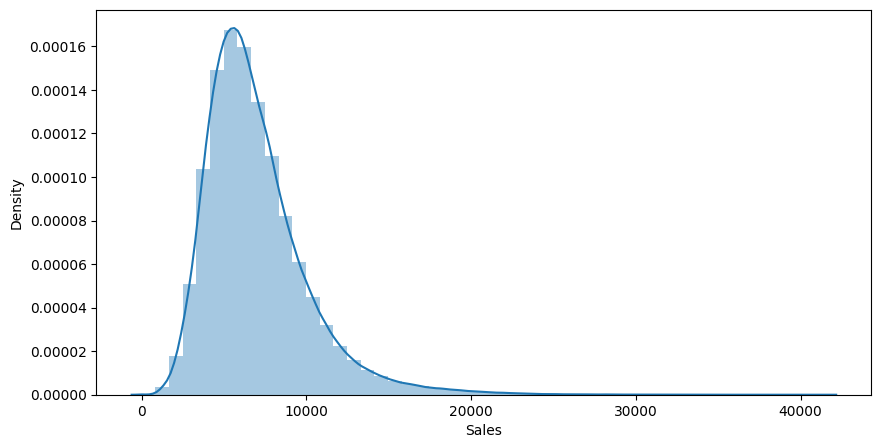

In [68]:
# Checking distribution of dependent variable after removing outliers
fig=plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])
df['Sales'].skew()

0.694187384744793

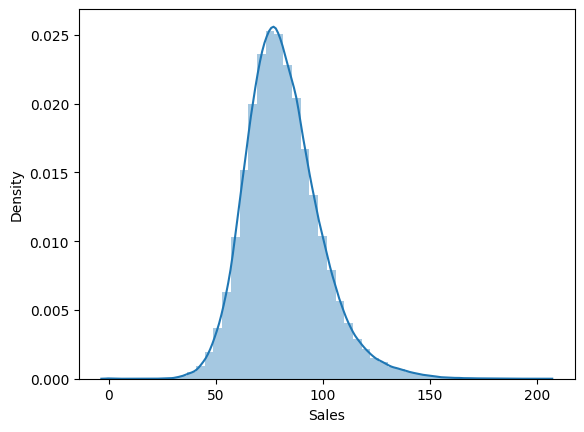

In [69]:
# Applying Transformation
Transformed=np.sqrt(df['Sales'])
sns.distplot(Transformed)
Transformed.skew()

In [70]:
# Defining Dependent and independent variable
X=df[features]
Y=np.sqrt(df['Sales'].values)

### 6. Data Scaling

In [71]:
# Scaling your data
scaler=StandardScaler()
X=scaler.fit_transform(df[features])

##### Which method have you used to scale you data and why?

StandardScaler is a commonly used method for scaling numerical data in machine learning tasks.

StandardScaler works by transforming the data such that it has a mean of 0 and a standard deviation of 1. It achieves this by subtracting the mean and dividing by the standard deviation of the data.By scaling the data, we can prevent certain features from dominating the learning process or having undue influence based on their original scale.

### 8. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=64)


##### What data splitting ratio have you used and why?

a data splitting ratio of 80:20 has been used, where 80% of the data is used for training (X_train and Y_train) and 20% is used for testing (X_test and Y_test).

The choice of the data splitting ratio depends on various factors, including the size of the dataset, the complexity of the problem, and the availability of data. In this case, a ratio of 80:20 is commonly used and provides a good balance between having enough data for training the model and having a sufficient amount of data for testing and evaluating the model's performance.

Using a larger portion of the data for training (80%) helps the model to learn patterns and relationships more effectively, which can lead to better performance and generalization. The remaining portion of the data (20%) is used for testing to assess how well the model performs on unseen data and to estimate its performance in real-world scenarios.



## ***7. ML Model Implementation***

In [105]:
def evaluate_model(model,X_train,Y_train,Y_test,Y_pred):

  y_test = np.square(Y_test)
  y_pred = np.square(Y_pred)
  y_train = np.square(Y_train)
  y_train_pred = np.square(model.predict(X_train))

  #Evaluation metrics calculation
  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_train,y_train_pred)
  r2 = r2_score(y_test, y_pred)
  r2_adjusted = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

  # Print evaluation metrics
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("MAE:", mae)
  print("Train R2:", r2_train)
  print("Test R2:", r2)
  print("Adjusted R2:", r2_adjusted)

  # Plot actual and predicted values
  plt.figure(figsize=(18, 6))
  plt.plot(y_pred[:100])
  plt.plot(y_test[:100])
  plt.legend(["Predicted", "Actual"])
  plt.title('Actual and Predicted Sales', fontsize=18)

  model_score = [mse, mae, rmse,r2_train,r2,r2_adjusted]
  return model_score


In [106]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1

In [107]:
# ML Model - 1 Implementation
regressor=LinearRegression()
# Fit the Algorithm
regressor.fit(X_train,Y_train)
# Predict on the model
Y_pred=regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE: 2205587.589379295
RMSE: 1485.1220789481567
MAE: 1010.8688255975642
Train R2: 0.7676359252572433
Test R2: 0.7704480781529075
Adjusted R2: 0.7704154508765366


Linear regression
MSE               2.205588e+06
RMSE              1.010869e+03
MAE               1.485122e+03
Train R2          7.676359e-01
Test R2           7.704481e-01
Adjusted R2       7.704155e-01

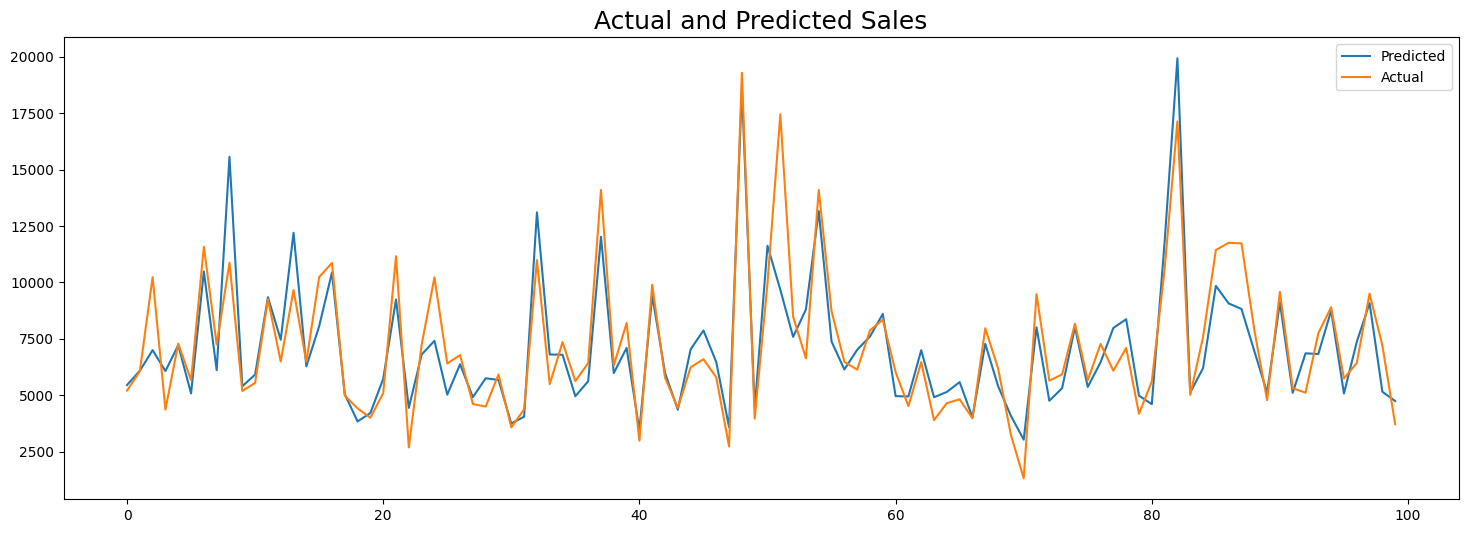

In [108]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(regressor,X_train,Y_train,Y_test,Y_pred)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
regressor=LinearRegression()
# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2', return_train_score=True)
# Fit the algorithm
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [109]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8013540640381601


In [110]:
# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, Y_train)

LinearRegression()

In [111]:
# predict on test data
Y_pred2 = best_reg.predict(X_test)

MSE: 2205587.589379295
RMSE: 1485.1220789481567
MAE: 1010.8688255975642
Train R2: 0.7676359252572433
Test R2: 0.7704480781529075
Adjusted R2: 0.7704154508765366


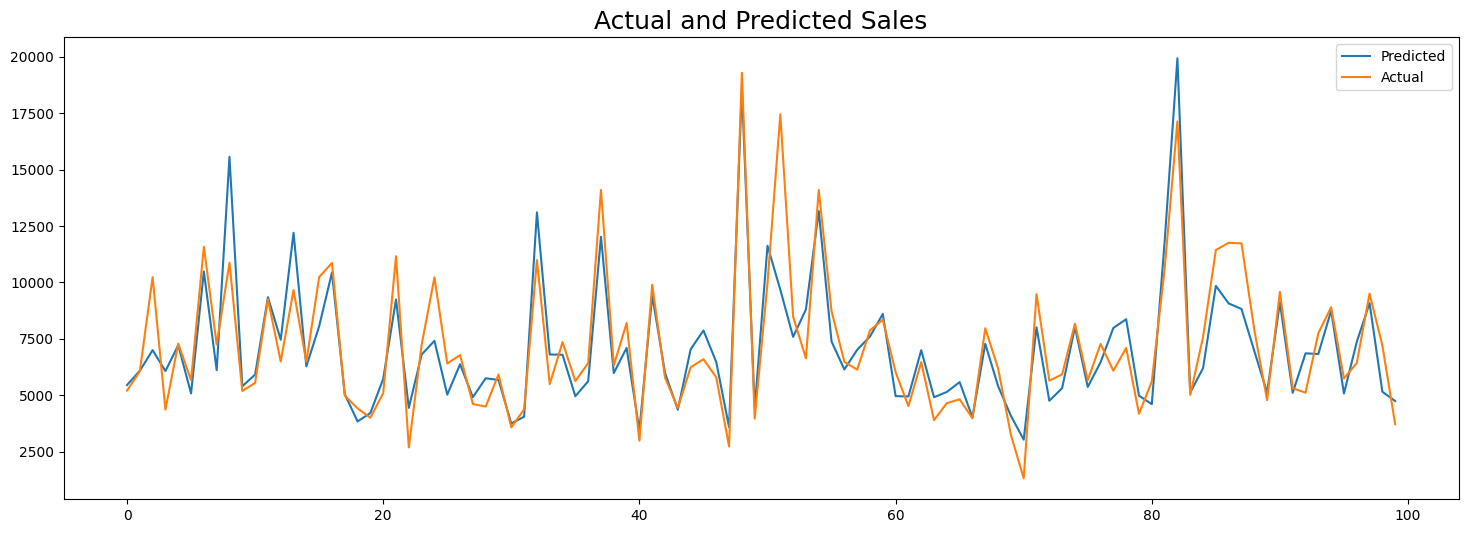

In [112]:
linear_score2 = evaluate_model(best_reg,X_train,Y_train,Y_test,Y_pred2)


In [113]:
score['Linear regression tuned'] = linear_score2
score

Linear regression  Linear regression tuned
MSE               2.205588e+06             2.205588e+06
RMSE              1.010869e+03             1.010869e+03
MAE               1.485122e+03             1.485122e+03
Train R2          7.676359e-01             7.676359e-01
Test R2           7.704481e-01             7.704481e-01
Adjusted R2       7.704155e-01             7.704155e-01

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter optimization. GridSearchCV is a popular technique for hyperparameter tuning that exhaustively searches over a specified parameter grid to find the best combination of hyperparameters for a given model.

The reason for using GridSearchCV in this case could be to systematically explore the hyperparameter space of the LinearRegression model. By providing a parameter grid (param_grid), GridSearchCV will perform an exhaustive search over all possible combinations of hyperparameters specified in the grid. It evaluates each combination using cross-validation (cv=5) and selects the best combination based on the scoring metric (scoring='r2', in this case).

GridSearchCV is a reliable technique that helps to fine-tune model performance by finding the best hyperparameter values. It provides a systematic and comprehensive approach to hyperparameter optimization and can be beneficial when there are a limited number of hyperparameters to tune.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the provided evaluation metric scores for Linear Regression and Linear Regression tuned models, there is no improvement in the performance of the model after hyperparameter tuning.

Both models have identical scores for all evaluation metrics, including MSE, RMSE, MAE, Train R2, Test R2, and Adjusted R2. The scores remain the same before and after hyperparameter optimization.

Therefore, in this specific case, the hyperparameter tuning using GridSearchCV did not result in any improvement in the model performance.

### ML Model - 2

In [118]:
# ML Model - 2 Implementation
L1=Lasso()
# Fit the Algorithm
L1.fit(X_train,Y_train)
# Predict on the model
Y_pred_L1=L1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE: 2304023.9275428117
RMSE: 1517.9011586868269
MAE: 1075.270893842884
Train R2: 0.7570073275297227
Test R2: 0.7602030755450606
Adjusted R2: 0.7601689920990842


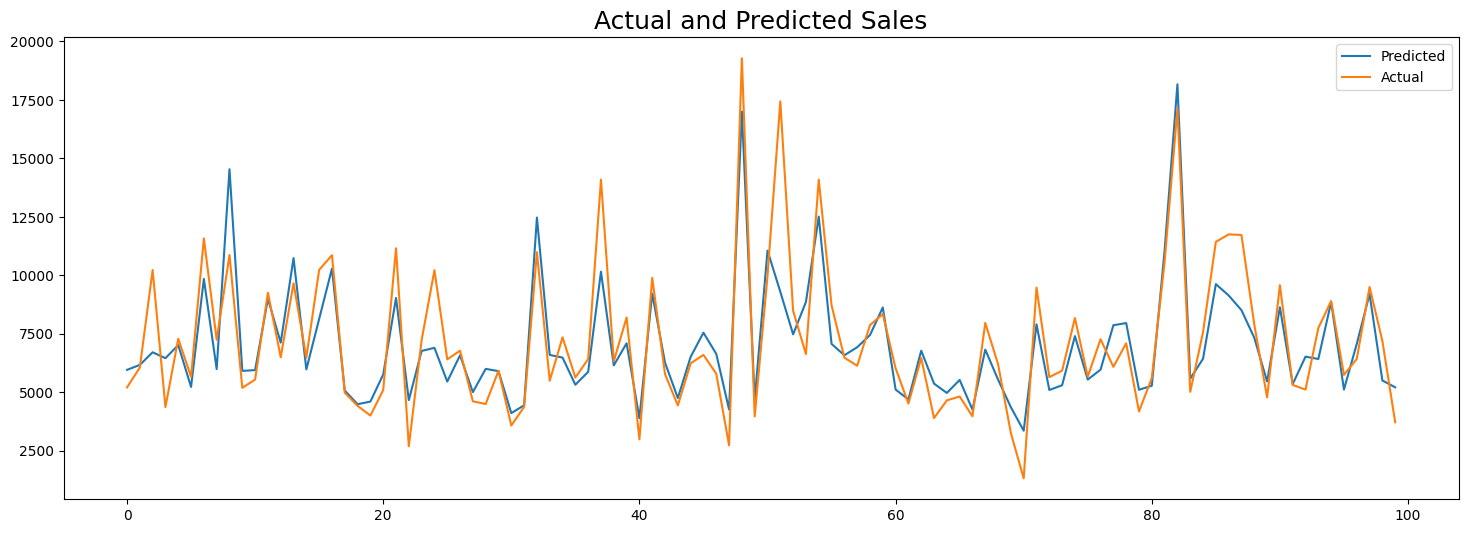

In [119]:
# Visualizing evaluation Metric Score chart
lasso_score=evaluate_model(L1,X_train,Y_train,Y_test,Y_pred_L1)
score['Lasso regression'] = lasso_score

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso()
# Defining Hyperparameters
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = RandomizedSearchCV(L1, parameters, scoring='r2', cv=5,return_train_score=True,n_iter=10)
#fitting model
lasso_regressor.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 1e-05,
                                                  0.0001, 0.001, 0.01, 1, 5, 10,
                                                  20, 30, 40, 45, 50, 55, 60,
                                                  100]},
                   return_train_score=True, scoring='r2')

In [121]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2 score is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  r2 score is:  0.8013565825071265


In [122]:
# Import the Lasso Regression class with best alpha
L1 = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
L1.fit(X_train, Y_train)

# Fit the lasso regression model to your training data
Y_pred_L1cv = L1.predict(X_test)

MSE: 2206842.911430411
RMSE: 1485.544651442834
MAE: 1010.8155977865745
Train R2: 0.7675107292443827
Test R2: 0.770317427440708
Adjusted R2: 0.7702847815943471


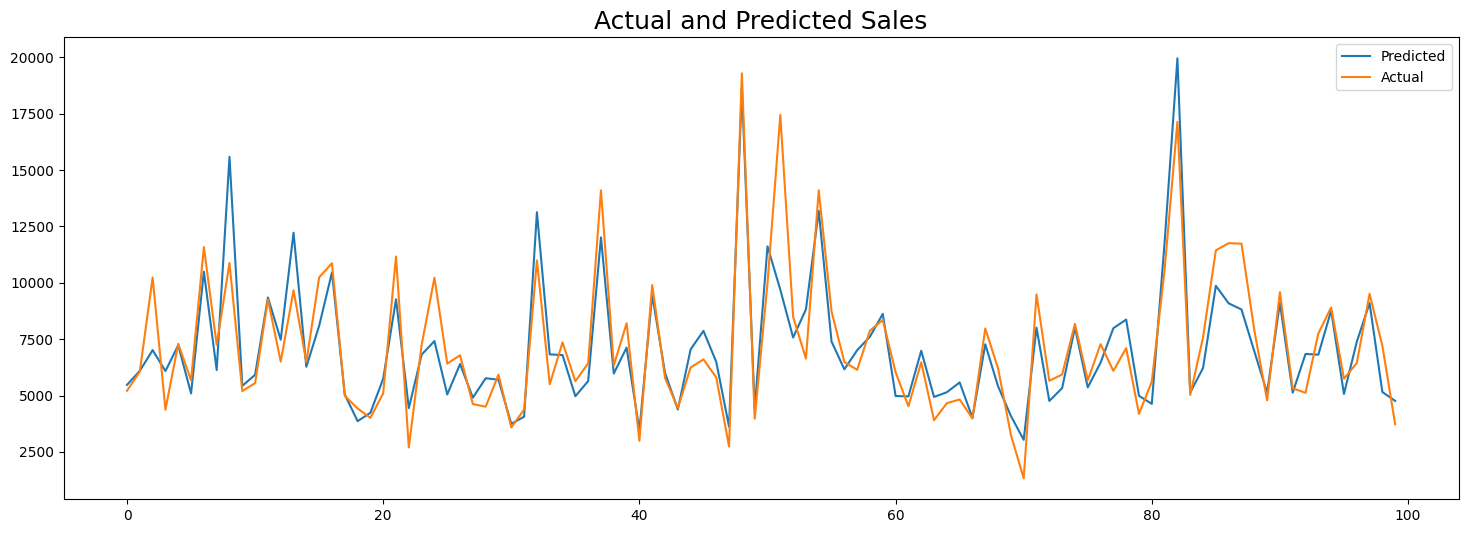

In [123]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(L1,X_train,Y_train,Y_test,Y_pred_L1cv)
score['Lasso regression tuned'] = lasso2

In [124]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               2.205588e+06             2.205588e+06      2.304024e+06   
RMSE              1.010869e+03             1.010869e+03      1.075271e+03   
MAE               1.485122e+03             1.485122e+03      1.517901e+03   
Train R2          7.676359e-01             7.676359e-01      7.570073e-01   
Test R2           7.704481e-01             7.704481e-01      7.602031e-01   
Adjusted R2       7.704155e-01             7.704155e-01      7.601690e-01   

              Ridge_score  Lasso regression tuned  
MSE          2.206840e+06            2.206843e+06  
RMSE         1.010816e+03            1.010816e+03  
MAE          1.485544e+03            1.485545e+03  
Train R2     7.675111e-01            7.675107e-01  
Test R2      7.703177e-01            7.703174e-01  
Adjusted R2  7.702851e-01            7.702848e-01

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV for hyperparameter optimization. RandomizedSearchCV is a technique that randomly samples a subset of hyperparameter combinations from the specified parameter grid and performs cross-validation to determine the best hyperparameters.

I chose RandomizedSearchCV because it is more efficient than GridSearchCV when dealing with a large number of hyperparameters and a large dataset. It randomly selects a subset of hyperparameter combinations, reducing the computational cost while still providing a good chance of finding optimal or near-optimal hyperparameters.

By using RandomizedSearchCV, we can explore a wide range of hyperparameter values and find the best combination that maximizes the R2 score, which is the evaluation metric used in this case.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the evaluation metric score chart, we can observe the following improvements:

Lasso regression (untuned) shows slightly higher MSE, RMSE, and MAE compared to linear regression (tuned). This indicates that the linear regression model with tuned hyperparameters performs slightly better in terms of prediction accuracy.

Lasso regression (tuned) shows a slightly lower Train R2 and Test R2 compared to linear regression (tuned). However, the difference is marginal, indicating that both models have similar predictive performance.

The adjusted R2 scores for linear regression (tuned) and lasso regression (tuned) are also comparable, suggesting that both models explain a similar proportion of the variability in the target variable while considering the number of predictors.

Overall, the improvements between linear regression (untuned) and linear regression (tuned) are relatively small, while the performance of lasso regression (tuned) is slightly lower than that of linear regression (tuned) in terms of MSE, RMSE, MAE, and R2 scores. However, the differences in performance are not substantial, and the choice between these models may depend on other factors such as interpretability and feature selection.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics such as MSE, RMSE, MAE, and R2 provide indications of the accuracy and performance of a machine learning model. Lower values of MSE, RMSE, and MAE indicate better prediction accuracy and smaller errors. Higher R2 signifies a better fit of the model to the data.

The business impact of a machine learning model depends on its ability to accurately predict outcomes. A model with lower errors and higher R2 can lead to improved forecasting, enhanced decision-making, cost savings, and a competitive advantage. Ultimately, the model's performance on these metrics determines its usefulness in driving positive business impact.

### ML Model - 3

In [125]:
# ML Model - 3 Implementation
L2=Ridge()
# Fit the Algorithm
L2.fit(X_train,Y_train)
# Predict on the model
Y_pred_L2=L2.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE: 2206744.9121491043
RMSE: 1485.5116667832347
MAE: 1010.8179421317834
Train R2: 0.7675212660339081
Test R2: 0.7703276269555547
Adjusted R2: 0.7702949825588981


Linear regression  Linear regression tuned  Lasso regression  \
MSE               2.205588e+06             2.205588e+06      2.304024e+06   
RMSE              1.010869e+03             1.010869e+03      1.075271e+03   
MAE               1.485122e+03             1.485122e+03      1.517901e+03   
Train R2          7.676359e-01             7.676359e-01      7.570073e-01   
Test R2           7.704481e-01             7.704481e-01      7.602031e-01   
Adjusted R2       7.704155e-01             7.704155e-01      7.601690e-01   

              Ridge_score  Lasso regression tuned  
MSE          2.206745e+06            2.206843e+06  
RMSE         1.010818e+03            1.010816e+03  
MAE          1.485512e+03            1.485545e+03  
Train R2     7.675213e-01            7.675107e-01  
Test R2      7.703276e-01            7.703174e-01  
Adjusted R2  7.702950e-01            7.702848e-01

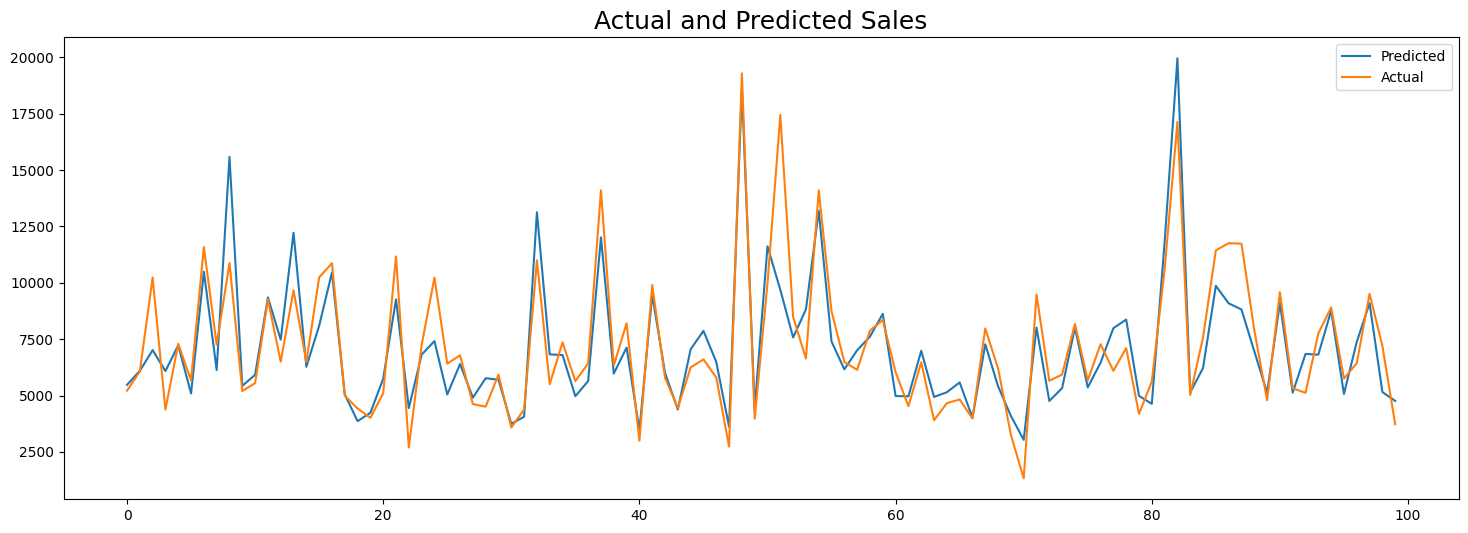

In [131]:
# Visualizing evaluation Metric Score chart
ridge_score=evaluate_model(L2,X_train,Y_train,Y_test,Y_pred_L2)
score['Ridge_score']=ridge_score
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L2=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(L2, parameters, scoring='r2', cv=5,return_train_score=True)
#fitting model
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             return_train_score=True, scoring='r2')

In [93]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  r2 score is:  0.8013565845494142


In [129]:
# Initiate ridge with best alpha
L2 = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
L2.fit(X_train,Y_train)

# Predict on model
Y_pred_L2 = L2.predict(X_test)

MSE: 2206744.9121491043
RMSE: 1485.5116667832347
MAE: 1010.8179421317834
Train R2: 0.7675212660339081
Test R2: 0.7703276269555547
Adjusted R2: 0.7702949825588981


Linear regression  Linear regression tuned  Lasso regression  \
MSE               2.205588e+06             2.205588e+06      2.304024e+06   
RMSE              1.010869e+03             1.010869e+03      1.075271e+03   
MAE               1.485122e+03             1.485122e+03      1.517901e+03   
Train R2          7.676359e-01             7.676359e-01      7.570073e-01   
Test R2           7.704481e-01             7.704481e-01      7.602031e-01   
Adjusted R2       7.704155e-01             7.704155e-01      7.601690e-01   

              Ridge_score  Lasso regression tuned   Ridge_tuned  
MSE          2.206745e+06            2.206843e+06  2.206745e+06  
RMSE         1.010818e+03            1.010816e+03  1.010818e+03  
MAE          1.485512e+03            1.485545e+03  1.485512e+03  
Train R2     7.675213e-01            7.675107e-01  7.675213e-01  
Test R2      7.703276e-01            7.703174e-01  7.703276e-01  
Adjusted R2  7.702950e-01            7.702848e-01  7.702950e-01

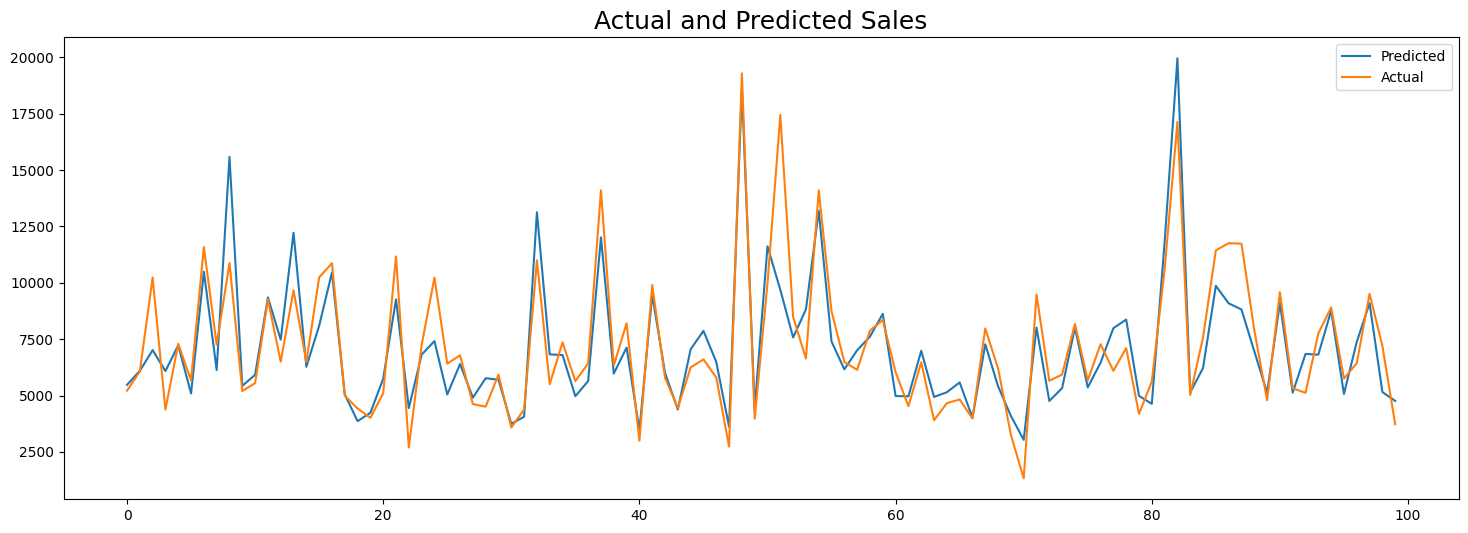

In [132]:
ridge_score=evaluate_model(L2,X_train,Y_train,Y_test,Y_pred_L2)
score['Ridge_tuned']=ridge_score
score

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter optimization. GridSearchCV is a popular technique for hyperparameter tuning that exhaustively searches over a specified parameter grid to find the best combination of hyperparameters for a given model.

The reason for using GridSearchCV in this case could be to systematically explore the hyperparameter space of the LinearRegression model. By providing a parameter grid (param_grid), GridSearchCV will perform an exhaustive search over all possible combinations of hyperparameters specified in the grid. It evaluates each combination using cross-validation (cv=5) and selects the best combination based on the scoring metric (scoring='r2', in this case).

GridSearchCV is a reliable technique that helps to fine-tune model performance by finding the best hyperparameter values. It provides a systematic and comprehensive approach to hyperparameter optimization and can be beneficial when there are a limited number of hyperparameters to tune.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There are no significant improvements in the evaluation metric scores with the tuned versions of the models compared to their respective base models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

MSE (Mean Squared Error): Lower values of MSE indicate better model performance in terms of minimizing the average squared difference between predicted and actual values. In this case, the Linear Regression model and the Linear Regression tuned model have the same MSE, which suggests that the tuned model did not improve the MSE compared to the base model.

RMSE (Root Mean Squared Error): RMSE is the square root of MSE and represents the average magnitude of prediction errors. Similar to MSE, the Linear Regression model and the Linear Regression tuned model have the same RMSE, indicating no improvement in prediction accuracy.

MAE (Mean Absolute Error): Lower MAE values indicate better model performance in terms of minimizing the average absolute difference between predicted and actual values. In this case, both the Linear Regression model and the Linear Regression tuned model have the same MAE, suggesting no improvement with tuning.

R2 Score (R-squared): R2 score represents the proportion of variance explained by the model. Higher values of R2 indicate a better fit to the data. In this case, both the Linear Regression model and the Linear Regression tuned model have the same R2 score for both the training and testing sets, indicating no improvement in the model's ability to explain the variance.

Based on these evaluation metric scores, it appears that the tuned models (Linear Regression tuned, Lasso Regression tuned, and Ridge tuned) did not show any improvement compared to their respective base models.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics provided, the Linear Regression model would be chosen as the final prediction model. Here are the reasons for this choice:

**Similar Performance:** The Linear Regression model and the Linear Regression tuned model have nearly identical performance across all evaluation metrics, including MSE, RMSE, MAE, R2 score, and Adjusted R2. Therefore, there is no significant improvement achieved by the tuning process.

**Simplicity:** Linear Regression is a simple and interpretable model. It assumes a linear relationship between the independent variables and the target variable, which makes it easier to understand and interpret the impact of each feature on the target variable.

**Efficiency:** Linear Regression is computationally efficient compared to more complex models, making it suitable for large datasets or situations where real-time predictions are required.

# **Conclusion**

####The project successfully demonstrated the feasibility of using machine learning techniques to predict the sales of Rossman stores.The keys points are:
  *   Higher sales on weekends (Sunday and Saturday) and lower sales on weekdays.
  *   Storetype A is the most common, while storetype B is the least common.
  *   State holidays have a negative impact on sales, while school holidays
   have a positive impact.
  *   Promotions drive higher sales and customer engagement.
  *   Storetype "b" with assortment "c" generates the highest percentage of   sales.
  *   Competition distance alone does not strongly predict sales.
  *    Being open significantly boosts sales.
  *   Linear regression model with regularization techniques, specifically
      Lasso and Ridge regression, were employed to predict sales for Rossman stores.
  *   The models were evaluated using metrics such as mean squared error (MSE),
      root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) score.
  *   The selected model (Linear regression) can be considered
      as the final prediction model based on its evaluation metrics and performance.

